### 실전 데이터분석반 최종 과제 - 크몽

안녕하세요. **DS School** X **크몽**입니다.

실전 데이터분석반의 최종 과제를 전달합니다. 이번 과제는 프리랜서 마켓 플랫폼 크몽의 데이터를 활용하여, 특정 사용자의 액티비티를 살펴보거나 전체 통계량을 살펴보는 일을 할 것입니다.

<Img src = 'https://t1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/11Yx/image/jNo1MfbPhIsud4DhAFh5fej9nQA.jpg' width=240>

크몽에서는 사용자가 서비스에 방문하면서 일어나는 모든 행동을 로그로 기록하고 있습니다. 로그 데이터는 서비스 자체를 상징하기에, 로그 데이터를 분석할 수 있다면 서비스를 다양한 관점에서 살펴보는 것이 가능합니다. 로그 데이터를 활용해서 할 수 있는 주요 업무는 다음과 같습니다.

  * 회사의 주요 핵심 지표 분석. 가령 전환율(Conversion Rate), 이탈률(Bounce rate) 등
  * 이를 더 세분화하여, 각 페이지별 전환율과 이탈률을 분석.
  * 사용자의 인구통계학정보(나이, 성별 등), 지역(서울, 부산 등), 사용 기기(아이폰, 갤럭시) 마다의 핵심 지표 분석.
  * 특정 상황에서 서비스상의 버그로 인해 사용자가 이탈하는 현상 감지.

<small>(참고 자료: <a href="http://woowabros.github.io/woowabros/2017/07/30/logdata.html">우아한형제들 기술블로그. 로그 데이터로 유저 이해하기</a>)</small>

그러므로 이번 최종 과제에서는 크몽의 로그 데이터를 활용하여, 사용자의 액티비티를 실시간으로 확인하거나, 서비스상에 문제(버그 등)가 없는지를 데이터 분석을 통해 알아볼 것입니다.

과제를 푸는데 주어진 시간은 없습니다. 과제를 받은 뒤, 시간에 구애받지 않고 천천히 문제를 풀어주세요. 이번 과제는 빠르게 푸는 것 보다 정확하게 푸는 것이 더 중요하다고 강조하고 싶습니다. 과제를 정확하게 풀었다는 기준은 다음과 같습니다.

  * 예시와 동일한 결과가 출력되는 코드를 작성해야 합니다. 결과가 예시와 다를 경우 무언가 코드에 오류가 있을 가능성이 있습니다.
  * 코드가 깔끔하게 정리되어 있고, 모듈화(=함수)가 잘 되어있으며, 코멘트가 자세하게 적혀 있어서 비 개발 직군(ex: 운영팀, 마케팅팀)이 코드와 코멘트를 보고 직접 수정할 수 있어야 합니다.
  * 장기적인 관점에서 확장 가능한 코드를 작성해야 합니다. 가령 사용자의 액티비티를 확인하는 코드를 작성할 때, 1) 로그 데이터에 새로운 컬럼이 추가되거나 2) 홈페이지나 어플리케이션에 새로운 기능이 생겼을 때 이를 자동으로 반영할 수 있어야 합니다.
  
과제를 모두 푼 분들은 datascience@dsschool.co.kr 에 1) 과제를 푼 쥬피터 노트북(.ipynb 파일)과, 2) 본인의 이력서를 첨부파일로 제출해주세요. 제출 결과를 확인한 뒤 크몽 담당 팀에게 전달하도록 하겠습니다. (단, 면접용 과제이기 때문에 이전 수업처럼 솔루션을 제공해드릴 수 없는 점 양해 부탁드립니다)


In [1]:
import glob
import pandas as pd
import matplotlib
from IPython.display import set_matplotlib_formats

# 화면에 출력할 최대 컬럼 개수를 50개로 늘려줍니다.
pd.options.display.max_columns = 50

# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
#matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('font', family='NanumGothic')

# 별도로, 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)

# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

### Load Dataset


먼저 크몽의 로그 데이터를 하나씩 가져오겠습니다. 먼저 가져올 데이터는 크몽 어플리케이션의 이벤트와 전환을 나타내는 ````kmong-conversion-v2-.csv``` 입니다. 컬럼 정보는 다음과 같습니다.

* ```eventcategory```: 앱의 이벤트에 대한 카테고리입니다. 크게 다음의 종류가 있습니다.
  - ```install```: 앱설치
  - ```launch```: 앱실행 
  - ```deeplinkLaunch```: 딥링크 통한 앱실행
  - ```goal```: 앱 내에서의 활동 여부
  - ```exit```: 앱 종료
  - ```foreground```, background```: 앱을 foreground, background로 전환
  - ```launchlnSession```: Session의 시작.
* ```isfirstactivity```: 해당 이벤트가 해당 유저에 한하여 첫 번째인지 혹은 두 번째 이상인지를 알려주는 값입니다. 
  - boolean 형식으로, 해당 이벤트가 해당 유저에 한하여 첫 번째 이벤트이면 True, 아니면 False를 갖습니다.
* ```apppackagename```: 앱의 패키지의 고유한 이름입니다. 안드로이드의 경우 applicationId을, iOS의 경우 Bundle ID를 가져오게 됩니다.
* ```appversion```: kmong 어플리케이션의 버전입니다.
* ```devicetype```: 사용자가 kmong app을 실행하고 있는 기기의 제품명입니다.
* ```devicemanufacturer```: 사용자가 kmong app을 실행하고 있는 기기의 제조회사입니다. 
* ```osversion```: 사용자가 kmong app을 실행하고 있는 기기의 os 버전입니다.
* ```canonicaldeviceuuid```: 사용자가 kmong app을 실행하고 있는 기기의 고유 식별자입니다. (사용자를 구분하는 식별자로 이용할 수 있습니다)
* ```sourcetype```: 해당 로그를 만든 고객이 유입된 경로입니다. 유료 광고 채널, 바이럴 채널, 앱 마켓 등으로 구분합니다.
* ```channel```: sourcetype과 동일하지만 조금 더 세분화되어 있습니다.
  - unattributed, WEB, google-play, m_naver, google, (not set), google.adwords, m_naverpowercontents, pc_naver, apple.searchads, facebook, m_daum
* ```params_campaign```: 마케터가 입력한 캠페인 파라미터 중 캠페인명입니다. 
* ```params_medium```: 마케터가 입력한 캠페인 파라미터 중 매체입니다.
* ```params_term```: 마케터가 입력한 캠페인 파라미터 중 키워드입니다.
* ```inappeventcategory```: 인앱이벤트 식별자값으로 인앱이벤트를 지칭하는 3개의 값(category > action > label) 중 가장 상위에 속하는 구분값입니다.
  - ```eventcategory```가 goal인 경우에만 제공됩니다.
  - 차후에 읽어올 funnel 데이터셋과 연결할 수 있습니다.
  - ex) seller_selling_history.view, gig_detail.view
* ```inappeventlabel```: categoryid와 동일합니다.
  - 차후에 읽어올 category 데이터셋과 연결할 수 있습니다.
  - 인앱이벤트를 지칭하는 3개의 값(category > action > label) 중 마지막에 속하는 구분값입니다.
* ```eventdatetime```: 모바일 클라이언트 상에서의 실제 이벤트 발생시간입니다. ISO 8601 표준에 따라서 제공됩니다. 
* ```isfirstgoalactivity```: goal 이벤트의 경우, 해당 Goal Label, Description, Key, Category를 가진 이벤트가 해당 유저에 한하여 첫 번째인지 혹은 두 번째 이상 인지를 알려주는 boolean 값입니다. 예를 들어 동일한 유저로부터 두 번 이상의 같은 Goal 이벤트가 발생한 경우(e.g. 동일한 물건 재구매 등) 이 값은 false가 됩니다.

* ```event_rank```: 데이터를 정렬하는데 필요한 컬럼입니다. log엔 기록되지 않으며, DS_School에서 제공하는 전처리된 컬럼입니다.

In [2]:
# kmong-conversion- 관련 csv파일 경로를 전부 가져옵니다.
file_list = glob.glob('data/raw_data/kmong-conversion-*.csv')

# 리스트의 메소드 중 하나인 .sort()를 이용하여 시간 순서대로 리스트를 정렬합니다.
file_list.sort()

# 상위 5개를 출력합니다.
file_list[:5]

['data/raw_data\\kmong-conversion-v2-20180928000000-20180928005959.csv',
 'data/raw_data\\kmong-conversion-v2-20180928010000-20180928015959.csv',
 'data/raw_data\\kmong-conversion-v2-20180928020000-20180928025959.csv',
 'data/raw_data\\kmong-conversion-v2-20180928030000-20180928035959.csv',
 'data/raw_data\\kmong-conversion-v2-20180928040000-20180928045959.csv']

In [3]:
from tqdm import tqdm_notebook

# read_csv로 모든 kmong-conversion 데이터를 읽어온 뒤
# 이를 판다스의 concatenate로 하나로 합칩니다.
log = pd.concat([pd.read_csv(csv, low_memory=False) for csv in tqdm_notebook(file_list)])

# log 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(log.shape)

# head()로 log 데이터의 상위 5개를 띄웁니다.
log.head()

<ipython-input-3-c2171eb43cb6>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  log = pd.concat([pd.read_csv(csv, low_memory=False) for csv in tqdm_notebook(file_list)])



(434244, 19)


,eventcategory,isfirstactivity,apppackagename,appversion,devicetype,devicemanufacturer,osversion,canonicaldeviceuuid,sourcetype,channel,params_campaign,params_medium,params_term,inappeventcategory,inappeventlabel,eventdatetime,rowuuid,isfirstgoalactivity,event_rank
0,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,unattributed,unattributed,NaN,NaN,NaN,home.view,NaN,2018-09-28T00:00:00+09:00,fd2a188c-bc9b-4702-9c47-b546b2614817,False,True
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,samsung,Android7.0,8a871e50-0717-4aed-9bad-04ac3c3793be,unattributed,unattributed,NaN,NaN,NaN,gig_detail.view,41201.0,2018-09-28T00:00:00+09:00,e62dccef-dd70-4415-8a33-c8324ddaed38,False,True
2,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS12.0,A9E5778A-8F3D-4597-9718-74BF953A9F64,unattributed,unattributed,NaN,NaN,NaN,inbox_detail.view,NaN,2018-09-28T00:00:00+09:00,14eb3197-db83-493a-b7be-83582960c40b,False,True
3,foreground,NaN,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,168761CB-CB67-4592-867D-52780D651297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-28T00:00:01+09:00,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,NaN,True
4,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,viral,WEB,NaN,NaN,NaN,buyer_order_track.view,NaN,2018-09-28T00:00:02+09:00,236e9946-7801-4898-b609-06c8ab1139dc,False,True


**Funnel_ID_app.p**

그 다음 가져올 데이터셋은 퍼널(Funnel) 정보입니다.

퍼널은은 한국어로 해석하면 깔대기로, 사용자가 서비스 접속 후 상품을 구매하기까지의 경로 구조를 의미합니다. 결제를 하기 위해서는 무조건 상품 설명을 통해서 방문해야하고, 상품 설명을 보기 위해서는 해당 상품을 찾을 수 있는 카테고리탭을 통해서만 방문할 수 있기 때문에 가장 마지막 단계 페이지의 방문자가 가장 적을 수 밖에 없습니다. 이러한 구조가 깔대기같다 하여 퍼널이라 불립니다.

퍼널을 이용해 전환과 이탈률을 측정함으로써 집중 개선 대상 페이지를 발견할 수 있으며 개선된 페이지의 성과까지 간단히 추적해 나갈 수 있습니다. 크몽 또한 앱에 다양한 퍼널이 구성되어 있고, 그 정보가 'Funnel_ID_app.p'에 저장되어 있습니다.

In [4]:

import pickle

# pickle을 활용해 퍼널 데이터를 읽어옵니다.
# 그리고 이 데이터를 funnel이라는 이름의 변수에 저장합니다.
funnel = pickle.load(open('data/kmong_rawdata_app_reference_tables/Funnel_ID_app.p','rb'))

# funnel 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(funnel.shape)

# funnel 데이터 전체를 출력합니다.
funnel

(53, 6)


,Lv2,viewid,viewid desc,Lv1,funnel name,funnel desc
0,1100,home,홈 (탭),11,home,홈
1,1210,category_list,카테고리 목록 (탭),12,category,카테고리
2,1200,category_gig,카테고리-상품목록,12,category,카테고리
3,1300,search,검색,13,search,검색
4,1301,search_gig,검색-상품목록,13,search,검색
5,1302,search_seller,검색-전문가,13,search,검색
6,1400,gig_detail,상품상세,14,gig,상품
7,1401,gig_detail_option,상품상세-상품선택,14,gig,상품
8,1420,profile,전문가프로필,14,gig,상품
9,1520,login_sns,간편로그인,15,login,로그인


마찬가지로 사용자가 어떤 상품탭에 들어갔는지에 대한 상품 분류 정보를 가지고 있는 categories.p 데이터도 pickle을 통해 읽어오겠습니다.

In [5]:
categories = pickle.load(open('data/kmong_rawdata_app_reference_tables/categories.p','rb'))

print(categories.shape)
categories

(245, 9)


,depth,categoryid,categoryname,cat1_id,cat2_id,cat3_id,cat1,cat2,cat3
0,1,1,디자인,1,NaN,NaN,디자인,NaN,NaN
1,1,2,마케팅,2,NaN,NaN,마케팅,NaN,NaN
2,1,3,번역·통역,3,NaN,NaN,번역·통역,NaN,NaN
3,1,4,문서작성,4,NaN,NaN,문서작성,NaN,NaN
4,1,6,IT·프로그래밍,6,NaN,NaN,IT·프로그래밍,NaN,NaN
...,...,...,...,...,...,...,...,...,...
240,3,72501,모델,7,725.0,72501.0,콘텐츠 제작,엔터테이너,모델
241,3,72502,MC,7,725.0,72502.0,콘텐츠 제작,엔터테이너,MC
242,3,72503,배우,7,725.0,72503.0,콘텐츠 제작,엔터테이너,배우
243,3,72504,공연,7,725.0,72504.0,콘텐츠 제작,엔터테이너,공연


### 1. 로그를 사용자별로 정렬한 뒤 살펴볼 수 있도록 정리해주세요.

로그데이터를 정리했으면 이를 정렬 및 분리를 하고 싶습니다. 기준은 다음과 같습니다.

  * 사용자 아이디(```userid```)마다 그룹핑이 되어있어야 합니다.
  * 그룹핑이 된 사용자를 기준으로, 최신 로그가 위로 올라와야 합니다.
  
또한 정리한 로그 데이터를 활용해 다음의 기능을 하는 함수를 구현했으면 좋겠습니다.

  * 특정 사용자 아이디(```userid```) 또는, 특정 사용자 아이디를 리스트로 여러 개 넣으면, 해당 사용자들의 로그 데이터만 별도록 색인할 수 있어야 합니다.
  * 특정 컬럼명을 리스트로 넣으면 해당 컬럼만 별도로 색인할 수 있어야 합니다.
  * 특정 ```viewid```를 리스트로 넣으면 그 ```viewid```에 해당하는 로그 데이터만 별도로 색인할 수 있어야 합니다.
  
최종적으로 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th></th>
         <th>eventdatetime</th>
         <th>devicemanufacturer</th>
         <th>devicetype</th>
         <th>ostype</th>
         <th>osversion</th>
         <th>appversion</th>
         <th>eventcategory</th>
         <th>viewid</th>
         <th>viewaction</th>
         <th>funnel desc</th>
         <th>viewid desc</th>
         <th>categoryname</th>
         <th>category1</th>
         <th>category2</th>
         <th>category3</th>
         <th>sourcetype</th>
         <th>channel</th>
         <th>params_campaign</th>
         <th>params_medium</th>
         <th>params_term</th>
         <th>isfirstactivity</th>
         <th>isfirstgoalactivity</th>
      </tr>
      <tr>
         <th>userid</th>
         <th>rowuuid</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>00000000-0000-0000-0000-000000000000</th>
         <th>2461124f-cd69-4a4d-8c38-3a51dc3087e2</th>
         <td>2018-09-29 07:32:23</td>
         <td>Apple</td>
         <td>iPhone</td>
         <td>iOS</td>
         <td>11.4.1</td>
         <td>4.0.4</td>
         <td>install</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>unattributed</td>
         <td>unattributed</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>False</td>
         <td>False</td>
      </tr>
      <tr>
         <th rowspan="4" valign="top">001B9A43-5F55-4145-84B5-6495DF1EAF80</th>
         <th>9e8a9758-b454-4f32-a905-112cd04e615b</th>
         <td>2018-09-29 11:07:35</td>
         <td>Apple</td>
         <td>iPhone</td>
         <td>iOS</td>
         <td>11.4.1</td>
         <td>4.0.4</td>
         <td>background</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>ea568a15-b66a-4618-97bf-ad9c9a8e40c9</th>
         <td>2018-09-29 11:07:34</td>
         <td>Apple</td>
         <td>iPhone</td>
         <td>iOS</td>
         <td>11.4.1</td>
         <td>4.0.4</td>
         <td>launch</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>unattributed</td>
         <td>unattributed</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>False</td>
         <td>False</td>
      </tr>
      <tr>
         <th>d276e79c-fc5f-4fc6-acea-c62ff38e7225</th>
         <td>2018-09-29 02:56:41</td>
         <td>Apple</td>
         <td>iPhone</td>
         <td>iOS</td>
         <td>11.4.1</td>
         <td>4.0.4</td>
         <td>background</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>db1ab8b6-2782-4158-a95c-f64cf8219b60</th>
         <td>2018-09-29 02:56:21</td>
         <td>Apple</td>
         <td>iPhone</td>
         <td>iOS</td>
         <td>11.4.1</td>
         <td>4.0.4</td>
         <td>goal</td>
         <td>gig_detail</td>
         <td>view</td>
         <td>상품</td>
         <td>상품상세</td>
         <td>로고디자인</td>
         <td>디자인</td>
         <td>로고디자인</td>
         <td>NaN</td>
         <td>unattributed</td>
         <td>unattributed</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>True</td>
         <td>False</td>
      </tr>
   </tbody>
</table>

In [6]:
# 먼저 기기별로 주어진 id값을 알아보기 쉽도록 userid 로 컬럼명을 변경합니다.
log = log.rename(columns ={'canonicaldeviceuuid':'userid'})

# log데이터의 컬럼명을 확인합니다.
log.columns


Index(['eventcategory', 'isfirstactivity', 'apppackagename', 'appversion',
       'devicetype', 'devicemanufacturer', 'osversion', 'userid', 'sourcetype',
       'channel', 'params_campaign', 'params_medium', 'params_term',
       'inappeventcategory', 'inappeventlabel', 'eventdatetime', 'rowuuid',
       'isfirstgoalactivity', 'event_rank'],
      dtype='object')

In [7]:
# log 데이터의 ostype 컬럼을 OS타입과 OS버전으로 따로 나누는 작업을 시행합니다.

# 먼저 OS타입을 가져올 수 있도록 find_ostype 함수를 정의합니다
def find_ostype(osversion):
    # osversion에 iOS라는 값이 있으면 아이폰이라고 간주하고 iOS라는 값을 반환합니다.
    if "iOS" in osversion:
        return 'iOS'
    # 그렇지 않으면 안드로이드라고 간주하고 Android라는 값을 반환합니다.
    else:
        return 'Android'
    
log['ostype'] = log['osversion'].apply(find_ostype)
log[['osversion','ostype']].head()

,osversion,ostype
0,iOS11.4.1,iOS
1,Android7.0,Android
2,iOS12.0,iOS
3,iOS11.4.1,iOS
4,iOS11.4.1,iOS


In [8]:
# OS버전을 가져올 수 있도록 find_osversion 함수를 정의합니다.
def find_osversion(osversion):
    return osversion.replace('iOS','').replace('Android','')

log['osversion(clean)'] = log['osversion'].apply(find_osversion)
log[['osversion','osversion(clean)']].head()

,osversion,osversion(clean)
0,iOS11.4.1,11.4.1
1,Android7.0,7.0
2,iOS12.0,12.0
3,iOS11.4.1,11.4.1
4,iOS11.4.1,11.4.1


log, funnel, categories 처럼 서로 떨어져 있으나 연관된 데이터를 서로 연결하여 데이터를 보다 쉽게 파악할 수 있도록 merge 하겠습니다.

In [9]:
# log 데이터와 funnel 데이터는 서로 inappeventcategory 컬럼과 viewid 컬럼으로 연결되어 있습니다.
# 해당 데이터를 바탕으로 데이터를 merge 하기 위해 먼저 log데이터의 inappeventcategory 컬럼을 수정하겠습니다.

import numpy as np

def find_viewid(inappeventcategory):
    if pd.isnull(inappeventcategory):
        return np.nan
    
    viewid = inappeventcategory.split(".")[0]
    
    return viewid


log['viewid'] = log['inappeventcategory'].apply(find_viewid)

log[['inappeventcategory','viewid']].head()

,inappeventcategory,viewid
0,home.view,home
1,gig_detail.view,gig_detail
2,inbox_detail.view,inbox_detail
3,NaN,NaN
4,buyer_order_track.view,buyer_order_track


In [10]:
#funnel 데이터와 합치기 위해 필요한 정보를 얻기 위해 inappeventcategory 컬럼에서 viewaction 컬럼을 추출합니다.
#inappeventcategory 컬럼에서 viewaction을 추출할 수 있는 find_viewaction 함수를 정의합니다.

def find_viewaction(inappeventcategory):
    if pd.isnull(inappeventcategory):
        return np.nan
    
    viewaction = inappeventcategory.split(".")[1]
    
    return viewaction

log['viewaction'] = log['inappeventcategory'].apply(find_viewaction)
log[['inappeventcategory','viewaction']].head()

,inappeventcategory,viewaction
0,home.view,view
1,gig_detail.view,view
2,inbox_detail.view,view
3,NaN,NaN
4,buyer_order_track.view,view


log와 funnel 데이터의 공통된 컬럼인 viewid를 기준으로 데이터를 합칩니다.(merge)

In [11]:
data = log.merge(funnel, on = 'viewid', how='left')
data.head()

,eventcategory,isfirstactivity,apppackagename,appversion,devicetype,devicemanufacturer,osversion,userid,sourcetype,channel,params_campaign,params_medium,params_term,inappeventcategory,inappeventlabel,eventdatetime,rowuuid,isfirstgoalactivity,event_rank,ostype,osversion(clean),viewid,viewaction,Lv2,viewid desc,Lv1,funnel name,funnel desc
0,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,unattributed,unattributed,NaN,NaN,NaN,home.view,NaN,2018-09-28T00:00:00+09:00,fd2a188c-bc9b-4702-9c47-b546b2614817,False,True,iOS,11.4.1,home,view,1100.0,홈 (탭),11.0,home,홈
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,samsung,Android7.0,8a871e50-0717-4aed-9bad-04ac3c3793be,unattributed,unattributed,NaN,NaN,NaN,gig_detail.view,41201.0,2018-09-28T00:00:00+09:00,e62dccef-dd70-4415-8a33-c8324ddaed38,False,True,Android,7.0,gig_detail,view,1400.0,상품상세,14.0,gig,상품
2,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS12.0,A9E5778A-8F3D-4597-9718-74BF953A9F64,unattributed,unattributed,NaN,NaN,NaN,inbox_detail.view,NaN,2018-09-28T00:00:00+09:00,14eb3197-db83-493a-b7be-83582960c40b,False,True,iOS,12.0,inbox_detail,view,1610.0,메시지목록-상세,16.0,inbox,메시지
3,foreground,NaN,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,168761CB-CB67-4592-867D-52780D651297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-28T00:00:01+09:00,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,NaN,True,iOS,11.4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,viral,WEB,NaN,NaN,NaN,buyer_order_track.view,NaN,2018-09-28T00:00:02+09:00,236e9946-7801-4898-b609-06c8ab1139dc,False,True,iOS,11.4.1,buyer_order_track,view,2410.0,메뉴목록-구매관리-거래메시지,24.0,transaction_history,거래관리


위의 데이터에 categories 데이터의 categoryid 컬럼과 inappeventlable 컬럼을 기준으로 merge합니다.

In [12]:
data = data.merge(categories, left_on = 'inappeventlabel', right_on = 'categoryid', how='left')
data.head()

,eventcategory,isfirstactivity,apppackagename,appversion,devicetype,devicemanufacturer,osversion,userid,sourcetype,channel,params_campaign,params_medium,params_term,inappeventcategory,inappeventlabel,eventdatetime,rowuuid,isfirstgoalactivity,event_rank,ostype,osversion(clean),viewid,viewaction,Lv2,viewid desc,Lv1,funnel name,funnel desc,depth,categoryid,categoryname,cat1_id,cat2_id,cat3_id,cat1,cat2,cat3
0,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,unattributed,unattributed,NaN,NaN,NaN,home.view,NaN,2018-09-28T00:00:00+09:00,fd2a188c-bc9b-4702-9c47-b546b2614817,False,True,iOS,11.4.1,home,view,1100.0,홈 (탭),11.0,home,홈,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,goal,False,com.kmong.kmong,3.3.5,SM-N935S,samsung,Android7.0,8a871e50-0717-4aed-9bad-04ac3c3793be,unattributed,unattributed,NaN,NaN,NaN,gig_detail.view,41201.0,2018-09-28T00:00:00+09:00,e62dccef-dd70-4415-8a33-c8324ddaed38,False,True,Android,7.0,gig_detail,view,1400.0,상품상세,14.0,gig,상품,3.0,41201.0,자기소개서,4.0,412.0,41201.0,문서작성,자기소개서·이력서,자기소개서
2,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS12.0,A9E5778A-8F3D-4597-9718-74BF953A9F64,unattributed,unattributed,NaN,NaN,NaN,inbox_detail.view,NaN,2018-09-28T00:00:00+09:00,14eb3197-db83-493a-b7be-83582960c40b,False,True,iOS,12.0,inbox_detail,view,1610.0,메시지목록-상세,16.0,inbox,메시지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,foreground,NaN,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,168761CB-CB67-4592-867D-52780D651297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-28T00:00:01+09:00,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,NaN,True,iOS,11.4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,goal,False,com.kmong.iOS,4.0.4,iPhone,Apple,iOS11.4.1,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,viral,WEB,NaN,NaN,NaN,buyer_order_track.view,NaN,2018-09-28T00:00:02+09:00,236e9946-7801-4898-b609-06c8ab1139dc,False,True,iOS,11.4.1,buyer_order_track,view,2410.0,메뉴목록-구매관리-거래메시지,24.0,transaction_history,거래관리,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


data의 불필요한 컬럼들을 정리하고, 필요한 정보가 앞에 오도록 컬럼을 정리해줍니다.

In [13]:
print(data.columns)

unnecessary_columns = ['apppackagename','osversion','inappeventcategory',
                     'inappeventlabel','Lv2','Lv1','funnel name','depth',
                     'categoryid','cat1_id','cat2_id','cat3_id']


data = data.drop(unnecessary_columns, axis=1).copy()

print(data.shape)
data.head()

Index(['eventcategory', 'isfirstactivity', 'apppackagename', 'appversion',
       'devicetype', 'devicemanufacturer', 'osversion', 'userid', 'sourcetype',
       'channel', 'params_campaign', 'params_medium', 'params_term',
       'inappeventcategory', 'inappeventlabel', 'eventdatetime', 'rowuuid',
       'isfirstgoalactivity', 'event_rank', 'ostype', 'osversion(clean)',
       'viewid', 'viewaction', 'Lv2', 'viewid desc', 'Lv1', 'funnel name',
       'funnel desc', 'depth', 'categoryid', 'categoryname', 'cat1_id',
       'cat2_id', 'cat3_id', 'cat1', 'cat2', 'cat3'],
      dtype='object')
(434244, 25)


,eventcategory,isfirstactivity,appversion,devicetype,devicemanufacturer,userid,sourcetype,channel,params_campaign,params_medium,params_term,eventdatetime,rowuuid,isfirstgoalactivity,event_rank,ostype,osversion(clean),viewid,viewaction,viewid desc,funnel desc,categoryname,cat1,cat2,cat3
0,goal,False,4.0.4,iPhone,Apple,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,unattributed,unattributed,NaN,NaN,NaN,2018-09-28T00:00:00+09:00,fd2a188c-bc9b-4702-9c47-b546b2614817,False,True,iOS,11.4.1,home,view,홈 (탭),홈,NaN,NaN,NaN,NaN
1,goal,False,3.3.5,SM-N935S,samsung,8a871e50-0717-4aed-9bad-04ac3c3793be,unattributed,unattributed,NaN,NaN,NaN,2018-09-28T00:00:00+09:00,e62dccef-dd70-4415-8a33-c8324ddaed38,False,True,Android,7.0,gig_detail,view,상품상세,상품,자기소개서,문서작성,자기소개서·이력서,자기소개서
2,goal,False,4.0.4,iPhone,Apple,A9E5778A-8F3D-4597-9718-74BF953A9F64,unattributed,unattributed,NaN,NaN,NaN,2018-09-28T00:00:00+09:00,14eb3197-db83-493a-b7be-83582960c40b,False,True,iOS,12.0,inbox_detail,view,메시지목록-상세,메시지,NaN,NaN,NaN,NaN
3,foreground,NaN,4.0.4,iPhone,Apple,168761CB-CB67-4592-867D-52780D651297,NaN,NaN,NaN,NaN,NaN,2018-09-28T00:00:01+09:00,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,NaN,True,iOS,11.4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,goal,False,4.0.4,iPhone,Apple,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,viral,WEB,NaN,NaN,NaN,2018-09-28T00:00:02+09:00,236e9946-7801-4898-b609-06c8ab1139dc,False,True,iOS,11.4.1,buyer_order_track,view,메뉴목록-구매관리-거래메시지,거래관리,NaN,NaN,NaN,NaN


In [14]:
# 컬럼명을 수정합니다.
data = data.rename(columns = {'osversion(clean)':'osversion', 'viewiddesc':'viewid desc',
                              'funneldesc':'funnel desc', 'cat3' : 'category3', 'cat2':'category2', 
                              'cat1':'category1'})

print(data.columns)

# 컬럼들을 정렬해줍니다.
col_order = ['userid','rowuuid','eventdatetime','devicemanufacturer','devicetype','ostype','osversion',
         'appversion','eventcategory','viewid','viewaction','funnel desc','viewid desc','categoryname','category1',
         'category2','category3','sourcetype','channel','params_campaign','params_medium','params_term',
         'isfirstactivity','isfirstgoalactivity']

data = data[col_order].copy()
data.head()

Index(['eventcategory', 'isfirstactivity', 'appversion', 'devicetype',
       'devicemanufacturer', 'userid', 'sourcetype', 'channel',
       'params_campaign', 'params_medium', 'params_term', 'eventdatetime',
       'rowuuid', 'isfirstgoalactivity', 'event_rank', 'ostype', 'osversion',
       'viewid', 'viewaction', 'viewid desc', 'funnel desc', 'categoryname',
       'category1', 'category2', 'category3'],
      dtype='object')


,userid,rowuuid,eventdatetime,devicemanufacturer,devicetype,ostype,osversion,appversion,eventcategory,viewid,viewaction,funnel desc,viewid desc,categoryname,category1,category2,category3,sourcetype,channel,params_campaign,params_medium,params_term,isfirstactivity,isfirstgoalactivity
0,F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,fd2a188c-bc9b-4702-9c47-b546b2614817,2018-09-28T00:00:00+09:00,Apple,iPhone,iOS,11.4.1,4.0.4,goal,home,view,홈,홈 (탭),NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
1,8a871e50-0717-4aed-9bad-04ac3c3793be,e62dccef-dd70-4415-8a33-c8324ddaed38,2018-09-28T00:00:00+09:00,samsung,SM-N935S,Android,7.0,3.3.5,goal,gig_detail,view,상품,상품상세,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,unattributed,NaN,NaN,NaN,False,False
2,A9E5778A-8F3D-4597-9718-74BF953A9F64,14eb3197-db83-493a-b7be-83582960c40b,2018-09-28T00:00:00+09:00,Apple,iPhone,iOS,12.0,4.0.4,goal,inbox_detail,view,메시지,메시지목록-상세,NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
3,168761CB-CB67-4592-867D-52780D651297,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,2018-09-28T00:00:01+09:00,Apple,iPhone,iOS,11.4.1,4.0.4,foreground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACABB7C0-4C76-413A-B314-E5D6DA0D0E5D,236e9946-7801-4898-b609-06c8ab1139dc,2018-09-28T00:00:02+09:00,Apple,iPhone,iOS,11.4.1,4.0.4,goal,buyer_order_track,view,거래관리,메뉴목록-구매관리-거래메시지,NaN,NaN,NaN,NaN,viral,WEB,NaN,NaN,NaN,False,False


userid, rowuuid 컬럼을 data 의 index로 지정합니다.

In [15]:
data.set_index(['userid','rowuuid'], inplace = True)
data.sort_index(inplace = True)

data

eventdatetime  \
userid                               rowuuid                                                           
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2  2018-09-29T16:32:23+09:00   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27  2018-09-28T02:00:49+09:00   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46  2018-09-28T11:49:54+09:00   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8  2018-09-28T01:58:36+09:00   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb  2018-09-28T01:59:52+09:00   
...                                                                                              ...   
ffffffff-c6bb-8616-cd10-2dbd151c76e2 3be0b187-14d7-4d01-92cc-535f153fc168  2018-09-29T13:53:08+09:00   
                                     6aa5e2a5-7bb1-4f8c-a46b-8a4fe2c0345d  2018-09-29T18:36:39+09:00   
                                     742eaabd-fefb-4765-a3bb-b27c5a7efc8c  2018-09-29T13:53:14+09:00   
                                     eebb6e4a-8a84-45e9-bb18-8061930f1e41  2018-09-29T18:36:38+09:00   
                                     fd4b85e1-b0f6-401a-946a-377572823490  2018-09-29T13:53:14+09:00   

                                                                          devicemanufacturer  \
userid                               rowuuid                                                   
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2              Apple   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27              Apple   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46              Apple   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8              Apple   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb              Apple   
...                                                                                      ...   
ffffffff-c6bb-8616-cd10-2dbd151c76e2 3be0b187-14d7-4d01-92cc-535f153fc168            samsung   
                                     6aa5e2a5-7bb1-4f8c-a46b-8a4fe2c0345d            samsung   
                                     742eaabd-fefb-4765-a3bb-b27c5a7efc8c            samsung   
                                     eebb6e4a-8a84-45e9-bb18-8061930f1e41            samsung   
                                     fd4b85e1-b0f6-401a-946a-377572823490            samsung   

                                                                          devicetype  \
userid                               rowuuid                                           
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2     iPhone   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27     iPhone   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46     iPhone   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8     iPhone   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb     iPhone   
...                                                                              ...   
ffffffff-c6bb-8616-cd10-2dbd151c76e2 3be0b187-14d7-4d01-92cc-535f153fc168  SHV-E250S   
                                     6aa5e2a5-7bb1-4f8c-a46b-8a4fe2c0345d  SHV-E250S   
                                     742eaabd-fefb-4765-a3bb-b27c5a7efc8c  SHV-E250S   
                                     eebb6e4a-8a84-45e9-bb18-8061930f1e41  SHV-E250S   
                                     fd4b85e1-b0f6-401a-946a-377572823490  SHV-E250S   

                                                                            ostype  \
userid                               rowuuid                                         
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2      iOS   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27      iOS

가장 최근의 데이터를 먼저 확인할 수 있도록 eventdatetime 컬럼을 시간 형태의 데이터로 변환합니다.

* 현재 eventdatetime 컬럼은 UTC 기준 시간이 적용되어 있으므로, 한국 기준의 시간에 맞도록 수정해주어야 합니다.

In [16]:
# UTC 시간이 '+' 기호로 적용되어있음을 알 수 있습니다. split 함수를 통해 '+' 기호 앞에 시간 데이터만 가져옵니다.

data['eventdatetime'] = data['eventdatetime'].str.split('+').str[0]
data.head()

eventdatetime  \
userid                               rowuuid                                                     
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2  2018-09-29T16:32:23   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27  2018-09-28T02:00:49   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46  2018-09-28T11:49:54   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8  2018-09-28T01:58:36   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb  2018-09-28T01:59:52   

                                                                          devicemanufacturer  \
userid                               rowuuid                                                   
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2              Apple   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27              Apple   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46              Apple   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8              Apple   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb              Apple   

                                                                          devicetype  \
userid                               rowuuid                                           
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2     iPhone   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27     iPhone   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46     iPhone   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8     iPhone   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb     iPhone   

                                                                          ostype  \
userid                               rowuuid                                       
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2    iOS   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27    iOS   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46    iOS   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8    iOS   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb    iOS   

                                                                          osversion  \
userid                               rowuuid                                          
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2    11.4.1   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27    11.4.1   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46    11.4.1   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8    11.4.1   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb    11.4.1   

                                                                          appversion  \
userid                               rowuuid                                           
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2      4.0.4   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27      4.0.4   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46      4.0.4   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8      4.0.4   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb      4.0.4   

                                                                          eventcategory  \
userid                               rowuuid                                              
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2       install   
001B9A43-5F55-4

In [17]:
# eventdatetime 컬럼의 데이터 형식을 시간 형태로 변형합니다.
data['eventdatetime'] = pd.to_datetime(data['eventdatetime'], format = '%Y-%m-%d')
data.dtypes

eventdatetime          datetime64[ns]
devicemanufacturer             object
devicetype                     object
ostype                         object
osversion                      object
appversion                     object
eventcategory                  object
viewid                         object
viewaction                     object
funnel desc                    object
viewid desc                    object
categoryname                   object
category1                      object
category2                      object
category3                      object
sourcetype                     object
channel                        object
params_campaign                object
params_medium                  object
params_term                    object
isfirstactivity                object
isfirstgoalactivity            object
dtype: object

In [18]:
# UTC 기준으로 9시간이 반영된 시간 데이터를 KST 기준 시간대로 맞춰줍니다.
# 시차가 9시간임으로 eventdatetime 컬럼의 모든 데이터에 9시간을 빼줍니다.

import datetime
time_diff  = datetime.timedelta(hours = 9)  # timedelta 를 사용해서 9시간 시차를 뺄 수 있습니다.

data['eventdatetime'] = data['eventdatetime'] - time_diff

data.head()

eventdatetime  \
userid                               rowuuid                                                    
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2 2018-09-29 07:32:23   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27 2018-09-27 17:00:49   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46 2018-09-28 02:49:54   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8 2018-09-27 16:58:36   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb 2018-09-27 16:59:52   

                                                                          devicemanufacturer  \
userid                               rowuuid                                                   
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2              Apple   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27              Apple   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46              Apple   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8              Apple   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb              Apple   

                                                                          devicetype  \
userid                               rowuuid                                           
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2     iPhone   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27     iPhone   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46     iPhone   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8     iPhone   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb     iPhone   

                                                                          ostype  \
userid                               rowuuid                                       
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2    iOS   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27    iOS   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46    iOS   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8    iOS   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb    iOS   

                                                                          osversion  \
userid                               rowuuid                                          
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2    11.4.1   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27    11.4.1   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46    11.4.1   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8    11.4.1   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb    11.4.1   

                                                                          appversion  \
userid                               rowuuid                                           
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2      4.0.4   
001B9A43-5F55-4145-84B5-6495DF1EAF80 00583adc-3b7a-4cf0-ac55-9a590aabaf27      4.0.4   
                                     01d15c04-6856-46b7-b94b-cf1e837e2d46      4.0.4   
                                     04f4b4f0-0a63-4431-b508-8bf922384ec8      4.0.4   
                                     0565566a-6c7f-413a-a76c-28d27f4c2cdb      4.0.4   

                                                                          eventcategory  \
userid                               rowuuid                                              
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2       install   
001B9A43-5F55-4145-84

가장 최근의 데이터가 상단에 올 수 있도록 eventdatetime 컬럼을 기준으로 data 를 정렬합니다

    * userid index 도 함께 정렬기준으로 잡아줍니다.

In [19]:
data.sort_values(by= ['userid','eventdatetime'], ascending = [True,False])

eventdatetime  \
userid                               rowuuid                                                    
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2 2018-09-29 07:32:23   
001B9A43-5F55-4145-84B5-6495DF1EAF80 9e8a9758-b454-4f32-a905-112cd04e615b 2018-09-29 11:07:35   
                                     ea568a15-b66a-4618-97bf-ad9c9a8e40c9 2018-09-29 11:07:34   
                                     d276e79c-fc5f-4fc6-acea-c62ff38e7225 2018-09-29 02:56:41   
                                     db1ab8b6-2782-4158-a95c-f64cf8219b60 2018-09-29 02:56:21   
...                                                                                       ...   
ffffffff-c6bb-8616-cd10-2dbd151c76e2 2d93369e-d40d-4b24-bc9c-4f569b9fd4d5 2018-09-29 04:53:15   
                                     742eaabd-fefb-4765-a3bb-b27c5a7efc8c 2018-09-29 04:53:14   
                                     fd4b85e1-b0f6-401a-946a-377572823490 2018-09-29 04:53:14   
                                     3be0b187-14d7-4d01-92cc-535f153fc168 2018-09-29 04:53:08   
                                     15073c7f-f4b1-4aeb-8aba-e23350411ab1 2018-09-29 04:53:06   

                                                                          devicemanufacturer  \
userid                               rowuuid                                                   
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2              Apple   
001B9A43-5F55-4145-84B5-6495DF1EAF80 9e8a9758-b454-4f32-a905-112cd04e615b              Apple   
                                     ea568a15-b66a-4618-97bf-ad9c9a8e40c9              Apple   
                                     d276e79c-fc5f-4fc6-acea-c62ff38e7225              Apple   
                                     db1ab8b6-2782-4158-a95c-f64cf8219b60              Apple   
...                                                                                      ...   
ffffffff-c6bb-8616-cd10-2dbd151c76e2 2d93369e-d40d-4b24-bc9c-4f569b9fd4d5            samsung   
                                     742eaabd-fefb-4765-a3bb-b27c5a7efc8c            samsung   
                                     fd4b85e1-b0f6-401a-946a-377572823490            samsung   
                                     3be0b187-14d7-4d01-92cc-535f153fc168            samsung   
                                     15073c7f-f4b1-4aeb-8aba-e23350411ab1            samsung   

                                                                          devicetype  \
userid                               rowuuid                                           
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2     iPhone   
001B9A43-5F55-4145-84B5-6495DF1EAF80 9e8a9758-b454-4f32-a905-112cd04e615b     iPhone   
                                     ea568a15-b66a-4618-97bf-ad9c9a8e40c9     iPhone   
                                     d276e79c-fc5f-4fc6-acea-c62ff38e7225     iPhone   
                                     db1ab8b6-2782-4158-a95c-f64cf8219b60     iPhone   
...                                                                              ...   
ffffffff-c6bb-8616-cd10-2dbd151c76e2 2d93369e-d40d-4b24-bc9c-4f569b9fd4d5  SHV-E250S   
                                     742eaabd-fefb-4765-a3bb-b27c5a7efc8c  SHV-E250S   
                                     fd4b85e1-b0f6-401a-946a-377572823490  SHV-E250S   
                                     3be0b187-14d7-4d01-92cc-535f153fc168  SHV-E250S   
                                     15073c7f-f4b1-4aeb-8aba-e23350411ab1  SHV-E250S   

                                                                            ostype  \
userid                               rowuuid                                         
00000000-0000-0000-0000-000000000000 2461124f-cd69-4a4d-8c38-3a51dc3087e2      iOS   
001B9A43-5F55-4145-84B5-6495DF1EAF80 9e8a9758-b454-4f32-a905-112cd04e615b      iOS   
                                     ea568a15-b66a-4618-97bf-ad9c9a8e40c9      i

다음의 기능을 구현한 ```find_log```라는 함수를 구현해주세요.

In [20]:
# find_log라는 함수를 정의합니다. 함수에는 여러 옵션이 들어가는데,
# user_id에는 사용자 아이디(user_id) 하나 또는 리스트를 넣을 수 있고, 지정한 사용자 아이디에 해당하는 로그 데이터를 반환합니다.
# 이 인자의 기본 값은 None입니다. 이 경우 모든 사용자의 로그 데이터를 반환합니다.
# columns에는 컬럼명 하나 또는 리스트를 넣을 수 있고, 로그 데이터에서 지정한 컬럼만 반환합니다.
# 이 인자의 기본 값은 None입니다. 이 경우 모든 컬럼을 반환합니다.
# viewid에는 viewid 하나 또는 리스트를 넣을 수 있고, 로그 데이터에서 지정한 viewid만을 반환합니다.
# 이 인자의 기본 값은 None입니다. 이 경우 모든 viewid를 반환합니다.
def find_log(user_id = None, columns = None, viewid = None):
    # ToDo: 여기에 코드를 작성하여 find_log라는 함수를 완성해주세요.
    result=data
    if(viewid!=None):
        if(type(viewid) is list):
            result=data.loc[data.viewid.isin(viewid)]
        else:
            result=data.loc[data.viewid==viewid]

    if(user_id!=None and columns==None):
        result= result.loc[user_id]
    elif(user_id==None and columns!=None):
        result=result.loc[:,columns]
    elif(user_id!=None and columns!=None):
        result=result.loc[user_id,columns]
    

    return result.sort_values(by="eventdatetime", ascending = False)
    pass 

In [21]:
find_log('fff40190-d751-425a-9813-2284072e47f5').head()

,eventdatetime,devicemanufacturer,devicetype,ostype,osversion,appversion,eventcategory,viewid,viewaction,funnel desc,viewid desc,categoryname,category1,category2,category3,sourcetype,channel,params_campaign,params_medium,params_term,isfirstactivity,isfirstgoalactivity
rowuuid,,,,,,,,,,,,,,,,,,,,,,
12dc5a10-2713-4a96-9693-3e29ca1a0f5c,2018-09-28 00:03:19,samsung,SM-G950N,Android,8.0.0,3.3.3,background,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f55223e0-52f5-41c2-8f0b-41c562baa3fc,2018-09-28 00:03:16,samsung,SM-G950N,Android,8.0.0,3.3.3,goal,inbox_detail,view,메시지,메시지목록-상세,NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
457da225-eaf2-4ffe-94e0-d3ffb7b93490,2018-09-28 00:02:41,samsung,SM-G950N,Android,8.0.0,3.3.3,goal,inbox_detail,view,메시지,메시지목록-상세,NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
d1da5023-8ef1-46ae-bd79-ab9208854c73,2018-09-28 00:02:41,samsung,SM-G950N,Android,8.0.0,3.3.3,launchInSession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20b8dfa9-4ac9-4b53-87d4-86db737fd7ef,2018-09-27 23:51:25,samsung,SM-G950N,Android,8.0.0,3.3.3,background,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


만일 특정 사용자, 가령 ```user_id```가 **fff40190-d751-425a-9813-2284072e47f5**인 사용자의 로그 데이터만 색인하면 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>eventdatetime</th>
         <th>devicemanufacturer</th>
         <th>devicetype</th>
         <th>ostype</th>
         <th>osversion</th>
         <th>appversion</th>
         <th>eventcategory</th>
         <th>viewid</th>
         <th>viewaction</th>
         <th>funnel desc</th>
         <th>viewid desc</th>
         <th>categoryname</th>
         <th>category1</th>
         <th>category2</th>
         <th>category3</th>
         <th>sourcetype</th>
         <th>channel</th>
         <th>params_campaign</th>
         <th>params_medium</th>
         <th>params_term</th>
         <th>isfirstactivity</th>
         <th>isfirstgoalactivity</th>
      </tr>
      <tr>
         <th>rowuuid</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>12dc5a10-2713-4a96-9693-3e29ca1a0f5c</th>
         <td>2018-09-28 00:03:19</td>
         <td>Samsung</td>
         <td>SM-G950N</td>
         <td>Android</td>
         <td>8.0.0</td>
         <td>3.3.3</td>
         <td>background</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>f55223e0-52f5-41c2-8f0b-41c562baa3fc</th>
         <td>2018-09-28 00:03:16</td>
         <td>Samsung</td>
         <td>SM-G950N</td>
         <td>Android</td>
         <td>8.0.0</td>
         <td>3.3.3</td>
         <td>goal</td>
         <td>inbox_detail</td>
         <td>view</td>
         <td>메시지</td>
         <td>메시지목록-상세</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>unattributed</td>
         <td>unattributed</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>False</td>
         <td>False</td>
      </tr>
      <tr>
         <th>457da225-eaf2-4ffe-94e0-d3ffb7b93490</th>
         <td>2018-09-28 00:02:41</td>
         <td>Samsung</td>
         <td>SM-G950N</td>
         <td>Android</td>
         <td>8.0.0</td>
         <td>3.3.3</td>
         <td>goal</td>
         <td>inbox_detail</td>
         <td>view</td>
         <td>메시지</td>
         <td>메시지목록-상세</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>unattributed</td>
         <td>unattributed</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>False</td>
         <td>False</td>
      </tr>
      <tr>
         <th>d1da5023-8ef1-46ae-bd79-ab9208854c73</th>
         <td>2018-09-28 00:02:41</td>
         <td>Samsung</td>
         <td>SM-G950N</td>
         <td>Android</td>
         <td>8.0.0</td>
         <td>3.3.3</td>
         <td>launchInSession</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>20b8dfa9-4ac9-4b53-87d4-86db737fd7ef</th>
         <td>2018-09-27 23:51:25</td>
         <td>Samsung</td>
         <td>SM-G950N</td>
         <td>Android</td>
         <td>8.0.0</td>
         <td>3.3.3</td>
         <td>background</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>a9d0ac01-b715-46f2-b92d-8570dfbc2cca</th>
         <td>2018-09-27 23:51:08</td>
         <td>Samsung</td>
         <td>SM-G950N</td>
         <td>Android</td>
         <td>8.0.0</td>
         <td>3.3.3</td>
         <td>goal</td>
         <td>inbox_detail</td>
         <td>view</td>
         <td>메시지</td>
         <td>메시지목록-상세</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>unattributed</td>
         <td>unattributed</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>False</td>
         <td>False</td>
      </tr>
      <tr>
         <th>af9381ed-25ca-4ba2-9a99-9a06f4c9bc26</th>
         <td>2018-09-27 23:50:22</td>
         <td>Samsung</td>
         <td>SM-G950N</td>
         <td>Android</td>
         <td>8.0.0</td>
         <td>3.3.3</td>
         <td>launch</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>unattributed</td>
         <td>unattributed</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>False</td>
         <td>False</td>
      </tr>
      <tr>
         <th>a773ad20-fb9c-4c6d-96fd-1861dec0cea8</th>
         <td>2018-09-27 23:50:22</td>
         <td>Samsung</td>
         <td>SM-G950N</td>
         <td>Android</td>
         <td>8.0.0</td>
         <td>3.3.3</td>
         <td>goal</td>
         <td>inbox_detail</td>
         <td>view</td>
         <td>메시지</td>
         <td>메시지목록-상세</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>unattributed</td>
         <td>unattributed</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>False</td>
         <td>False</td>
      </tr>
   </tbody>
</table>

In [22]:
find_log(user_id = 'fff40190-d751-425a-9813-2284072e47f5', 
         columns = ['eventdatetime', 'eventcategory', 'viewid','viewaction','funnel desc','viewid desc']).head()

,eventdatetime,eventcategory,viewid,viewaction,funnel desc,viewid desc
rowuuid,,,,,,
12dc5a10-2713-4a96-9693-3e29ca1a0f5c,2018-09-28 00:03:19,background,NaN,NaN,NaN,NaN
f55223e0-52f5-41c2-8f0b-41c562baa3fc,2018-09-28 00:03:16,goal,inbox_detail,view,메시지,메시지목록-상세
457da225-eaf2-4ffe-94e0-d3ffb7b93490,2018-09-28 00:02:41,goal,inbox_detail,view,메시지,메시지목록-상세
d1da5023-8ef1-46ae-bd79-ab9208854c73,2018-09-28 00:02:41,launchInSession,NaN,NaN,NaN,NaN
20b8dfa9-4ac9-4b53-87d4-86db737fd7ef,2018-09-27 23:51:25,background,NaN,NaN,NaN,NaN


또한 가령 ```user_id```가 **fff40190-d751-425a-9813-2284072e47f5**인 사용자의 로그 데이터 중에서, ```eventdatetime```, ```eventcategory```, ```viewid```, ```viewaction```, ```funnel desc```, ```viewid desc``` 컬럼만 출력하길 원한다면 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe" style="float: left;">
   <thead>
      <tr style="text-align: right;">
         <th></th>
         <th>eventdatetime</th>
         <th>eventcategory</th>
         <th>viewid</th>
         <th>viewaction</th>
         <th>funnel desc</th>
         <th>viewid desc</th>
      </tr>
      <tr>
         <th>rowuuid</th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
         <th></th>
      </tr>
   </thead>
   <tbody>
      <tr>
         <th>12dc5a10-2713-4a96-9693-3e29ca1a0f5c</th>
         <td>2018-09-28 00:03:19</td>
         <td>background</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>f55223e0-52f5-41c2-8f0b-41c562baa3fc</th>
         <td>2018-09-28 00:03:16</td>
         <td>goal</td>
         <td>inbox_detail</td>
         <td>view</td>
         <td>메시지</td>
         <td>메시지목록-상세</td>
      </tr>
      <tr>
         <th>457da225-eaf2-4ffe-94e0-d3ffb7b93490</th>
         <td>2018-09-28 00:02:41</td>
         <td>goal</td>
         <td>inbox_detail</td>
         <td>view</td>
         <td>메시지</td>
         <td>메시지목록-상세</td>
      </tr>
      <tr>
         <th>d1da5023-8ef1-46ae-bd79-ab9208854c73</th>
         <td>2018-09-28 00:02:41</td>
         <td>launchInSession</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>20b8dfa9-4ac9-4b53-87d4-86db737fd7ef</th>
         <td>2018-09-27 23:51:25</td>
         <td>background</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>a9d0ac01-b715-46f2-b92d-8570dfbc2cca</th>
         <td>2018-09-27 23:51:08</td>
         <td>goal</td>
         <td>inbox_detail</td>
         <td>view</td>
         <td>메시지</td>
         <td>메시지목록-상세</td>
      </tr>
      <tr>
         <th>af9381ed-25ca-4ba2-9a99-9a06f4c9bc26</th>
         <td>2018-09-27 23:50:22</td>
         <td>launch</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
         <td>NaN</td>
      </tr>
      <tr>
         <th>a773ad20-fb9c-4c6d-96fd-1861dec0cea8</th>
         <td>2018-09-27 23:50:22</td>
         <td>goal</td>
         <td>inbox_detail</td>
         <td>view</td>
         <td>메시지</td>
         <td>메시지목록-상세</td>
      </tr>
   </tbody>
</table>

In [23]:
find_log(user_id = 'fff40190-d751-425a-9813-2284072e47f5', viewid = ["home", "inbox_detail", "inbox", "gig_detail", "thankyou"])

,eventdatetime,devicemanufacturer,devicetype,ostype,osversion,appversion,eventcategory,viewid,viewaction,funnel desc,viewid desc,categoryname,category1,category2,category3,sourcetype,channel,params_campaign,params_medium,params_term,isfirstactivity,isfirstgoalactivity
rowuuid,,,,,,,,,,,,,,,,,,,,,,
f55223e0-52f5-41c2-8f0b-41c562baa3fc,2018-09-28 00:03:16,samsung,SM-G950N,Android,8.0.0,3.3.3,goal,inbox_detail,view,메시지,메시지목록-상세,NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
457da225-eaf2-4ffe-94e0-d3ffb7b93490,2018-09-28 00:02:41,samsung,SM-G950N,Android,8.0.0,3.3.3,goal,inbox_detail,view,메시지,메시지목록-상세,NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
a9d0ac01-b715-46f2-b92d-8570dfbc2cca,2018-09-27 23:51:08,samsung,SM-G950N,Android,8.0.0,3.3.3,goal,inbox_detail,view,메시지,메시지목록-상세,NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
a773ad20-fb9c-4c6d-96fd-1861dec0cea8,2018-09-27 23:50:22,samsung,SM-G950N,Android,8.0.0,3.3.3,goal,inbox_detail,view,메시지,메시지목록-상세,NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False


마지막으로 ```user_id```가 **fff40190-d751-425a-9813-2284072e47f5**인 사용자의 로그 데이터 중에서, ```viewid```가 "home", "inbox_detail", "inbox", "gig_detail", "thankyou" 인 로그 데이터만 출력하길 원한다면 다음의 결과가 나와야 합니다.

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>eventdatetime</th>      <th>devicemanufacturer</th>      <th>devicetype</th>      <th>ostype</th>      <th>osversion</th>      <th>appversion</th>      <th>eventcategory</th>      <th>viewid</th>      <th>viewaction</th>      <th>funnel desc</th>      <th>viewid desc</th>      <th>categoryname</th>      <th>category1</th>      <th>category2</th>      <th>category3</th>      <th>sourcetype</th>      <th>channel</th>      <th>params_campaign</th>      <th>params_medium</th>      <th>params_term</th>      <th>isfirstactivity</th>      <th>isfirstgoalactivity</th>    </tr>    <tr>      <th>rowuuid</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>f55223e0-52f5-41c2-8f0b-41c562baa3fc</th>      <td>2018-09-28 00:03:16</td>      <td>Samsung</td>      <td>SM-G950N</td>      <td>Android</td>      <td>8.0.0</td>      <td>3.3.3</td>      <td>goal</td>      <td>inbox_detail</td>      <td>view</td>      <td>메시지</td>      <td>메시지목록-상세</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>unattributed</td>      <td>unattributed</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>False</td>      <td>False</td>    </tr>    <tr>      <th>457da225-eaf2-4ffe-94e0-d3ffb7b93490</th>      <td>2018-09-28 00:02:41</td>      <td>Samsung</td>      <td>SM-G950N</td>      <td>Android</td>      <td>8.0.0</td>      <td>3.3.3</td>      <td>goal</td>      <td>inbox_detail</td>      <td>view</td>      <td>메시지</td>      <td>메시지목록-상세</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>unattributed</td>      <td>unattributed</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>False</td>      <td>False</td>    </tr>    <tr>      <th>a9d0ac01-b715-46f2-b92d-8570dfbc2cca</th>      <td>2018-09-27 23:51:08</td>      <td>Samsung</td>      <td>SM-G950N</td>      <td>Android</td>      <td>8.0.0</td>      <td>3.3.3</td>      <td>goal</td>      <td>inbox_detail</td>      <td>view</td>      <td>메시지</td>      <td>메시지목록-상세</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>unattributed</td>      <td>unattributed</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>False</td>      <td>False</td>    </tr>    <tr>      <th>a773ad20-fb9c-4c6d-96fd-1861dec0cea8</th>      <td>2018-09-27 23:50:22</td>      <td>Samsung</td>      <td>SM-G950N</td>      <td>Android</td>      <td>8.0.0</td>      <td>3.3.3</td>      <td>goal</td>      <td>inbox_detail</td>      <td>view</td>      <td>메시지</td>      <td>메시지목록-상세</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>unattributed</td>      <td>unattributed</td>      <td>NaN</td>      <td>NaN</td>      <td>NaN</td>      <td>False</td>      <td>False</td>    </tr>  </tbody></table>

### 2. 최근 48시간의 페이지뷰의 변화량을 출력해주세요.

정리한 로그 데이터를 바탕으로, 로그가 기록된 2018년 09월 28일부터 29일까지의 48시간동안 발생한 페이지뷰의 변화량을 출력하고 싶습니다. 사용자가 서비스를 한 번 이용할 때 마다 페이지뷰가 한 번 올라갔다고 가정합니다. (즉, 전체 데이터의 개수인 434,244개를 최근 48시간동안의 페이지뷰라고 가정하겠습니다) 가령 다음의 그림이 나와야 합니다.

In [24]:
# 시각화 패키지 tool 인 matplotlib ,seaborn 을 불러옵니다.
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# 그래프의 한글 폰트가 깨지는 것을 방지하기 위해 font_manager 를 불러와 사용자의 PC 환경에 맞는 폰트를 적용합니다.
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif patform.system() == 'Darwin':
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

In [26]:
# 시계열을 활용해 데이터를 활용하기 위해 기존 데이터인 data 를 copy 해 새로운 데이터를 만들곘습니다.
data_time = data.copy()

# 시간의 흐름 대로 데이터를 정렬하기 위해 기존과 다르게 가장 오래된 데이터가 상단에 위치할 수 있도록 정렬합니다.
data_time = data_time.sort_values(by = 'eventdatetime', ascending = True)

data_time.head()

,,eventdatetime,devicemanufacturer,devicetype,ostype,osversion,appversion,eventcategory,viewid,viewaction,funnel desc,viewid desc,categoryname,category1,category2,category3,sourcetype,channel,params_campaign,params_medium,params_term,isfirstactivity,isfirstgoalactivity
userid,rowuuid,,,,,,,,,,,,,,,,,,,,,,
A9E5778A-8F3D-4597-9718-74BF953A9F64,14eb3197-db83-493a-b7be-83582960c40b,2018-09-27 15:00:00,Apple,iPhone,iOS,12.0,4.0.4,goal,inbox_detail,view,메시지,메시지목록-상세,NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
8a871e50-0717-4aed-9bad-04ac3c3793be,e62dccef-dd70-4415-8a33-c8324ddaed38,2018-09-27 15:00:00,samsung,SM-N935S,Android,7.0,3.3.5,goal,gig_detail,view,상품,상품상세,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,unattributed,NaN,NaN,NaN,False,False
F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,fd2a188c-bc9b-4702-9c47-b546b2614817,2018-09-27 15:00:00,Apple,iPhone,iOS,11.4.1,4.0.4,goal,home,view,홈,홈 (탭),NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False
168761CB-CB67-4592-867D-52780D651297,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,2018-09-27 15:00:01,Apple,iPhone,iOS,11.4.1,4.0.4,foreground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8a871e50-0717-4aed-9bad-04ac3c3793be,a6d462c3-d4a3-4a2c-8942-88f2cae0012e,2018-09-27 15:00:02,samsung,SM-N935S,Android,7.0,3.3.5,goal,gig_detail,view,상품,상품상세,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,unattributed,NaN,NaN,NaN,False,False


In [27]:
# data_time 데이터의 eventdatetime 컬럼을 일(day), 시(hour), 분(minute) 으로 나누어 새로운 컬럼을 만듭니다.
data_time['day'] = data_time['eventdatetime'].dt.day
data_time['hour'] = data_time['eventdatetime'].dt.hour
data_time['minute'] = data_time['eventdatetime'].dt.minute

data_time[['eventdatetime','day','hour','minute']].head()

,,eventdatetime,day,hour,minute
userid,rowuuid,,,,
A9E5778A-8F3D-4597-9718-74BF953A9F64,14eb3197-db83-493a-b7be-83582960c40b,2018-09-27 15:00:00,27,15,0
8a871e50-0717-4aed-9bad-04ac3c3793be,e62dccef-dd70-4415-8a33-c8324ddaed38,2018-09-27 15:00:00,27,15,0
F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,fd2a188c-bc9b-4702-9c47-b546b2614817,2018-09-27 15:00:00,27,15,0
168761CB-CB67-4592-867D-52780D651297,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,2018-09-27 15:00:01,27,15,0
8a871e50-0717-4aed-9bad-04ac3c3793be,a6d462c3-d4a3-4a2c-8942-88f2cae0012e,2018-09-27 15:00:02,27,15,0


In [28]:
# 시간의 흐름에 따라 전체 페이지 뷰의 변동을 파악하곘습니다.
# 시간의 기준은 분(min)으로 15분 간격으로 데이터의 변동을 파악하기 위해 각각의 시간 데이터의 총 분 (total minute)을 구해
# agg_min 컬럼을 새로 만들고 그 안에 값을 넣겠습니다.

def agg_min(rows):
    day = rows['day']           # 앞서 만든 day 컬럼의 값을 변수로 가져옵니다.
    hour = rows['hour']         # 앞서 만든 hour 컬럼의 값을 변수로 가져옵니다.
    minute = rows['minute']     # 앞서 만든 minute 컬럼의 값을 변수로 가져옵니다.
    
    if day == 27 :
        if minute < 15:          # 15분 단위로 조건을 주어 시간대를 15분 단위로 묶겠습니다.
            return 60*hour - 15*60      # 데이터의 시간 시작값이 15시이므로 기준이 0 분이 되도록 15*60분 만큼 값을 빼줍니다.

        elif minute >= 15 and minute < 30:
            return 60*hour - 15*60 + 15

        elif minute >= 30 and minute < 45:
            return 60*hour - 15*60 + 30

        else:
            return 60*hour - 15*60 + 45

    elif day == 28:
        if minute < 15:
            return 24*60 + 60*hour - 15*60

        elif minute >= 15 and minute < 30:
            return 24*60 + 60*hour - 15*60 + 15
        
        elif minute >= 30 and minute < 45:
            return 24*60 + 60*hour - 15*60 + 30

        else:
            return 24*60 + 60*hour - 15*60 + 45

    else:
        if minute < 15 :
            return 24*60*2 + 60*hour -15*60
        
        elif minute >= 15 and minute < 30:
            return 24*60*2 + 60*hour -15*60 + 15
        
        elif minute >= 30 and minute < 45 :
            return 24*60*2 + 60*hour -15*60 + 30
 
        else:
            return 24*60*2 + 60*hour -15*60 + 45


# 위에서 만든 agg_min 함수를 통해 agg_minute 라는 새로운 컬럼을 만들어 data_time 데이터에 추가합니다.
data_time['agg_minute'] = data_time.apply(agg_min, axis = 1)

# 해당 함수가 잘 적용되었는 지 확인합니다.
data_time[['day','hour','minute','agg_minute']].head()

,,day,hour,minute,agg_minute
userid,rowuuid,,,,
A9E5778A-8F3D-4597-9718-74BF953A9F64,14eb3197-db83-493a-b7be-83582960c40b,27,15,0,0
8a871e50-0717-4aed-9bad-04ac3c3793be,e62dccef-dd70-4415-8a33-c8324ddaed38,27,15,0,0
F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,fd2a188c-bc9b-4702-9c47-b546b2614817,27,15,0,0
168761CB-CB67-4592-867D-52780D651297,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,27,15,0,0
8a871e50-0717-4aed-9bad-04ac3c3793be,a6d462c3-d4a3-4a2c-8942-88f2cae0012e,27,15,0,0


In [29]:
# 시간의 흐름에 따라 전체 페이지 뷰의 변화를 쉽게 볼 수 있도록 time_view 피벗 테이블을 만들겠습니다.
time_view = pd.pivot_table(data = data_time, index = 'agg_minute', values = 'day', aggfunc = 'count')
time_view.head()

,day
agg_minute,
0,2388
15,1938
30,2035
45,1878
60,1492


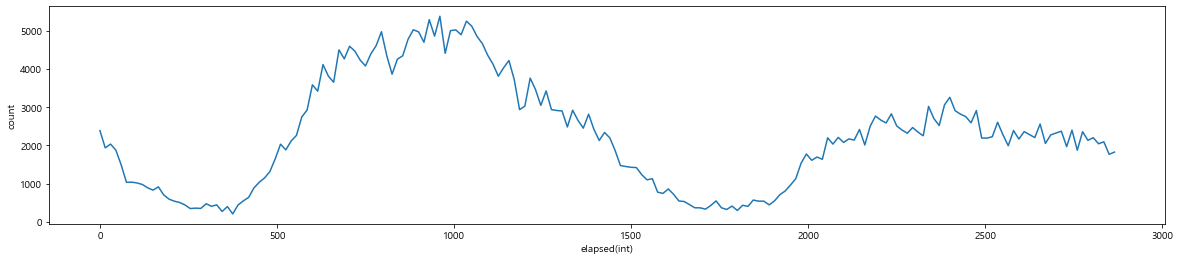

In [30]:
plt.figure(figsize = (20,4))              # 시각화 그래프의 크기를 가로 20, 세로 4의 크기로 설정합니다.
plt.plot(time_view.index, time_view.day)  # 그래프의 x축은 time_view 데이터의 index 값인 agg_minute, y축은 day 컬럼으로 지정합니다.

plt.xlabel('elapsed(int)')        # x축의 이름은 elapsed(int)로 설정합니다.
plt.ylabel('count')               # y축의 이름은 count로 설정합니다.
plt.show()

이 그림에 추가로, 다음의 조건에 해당하는 데이터만 별도로 페이지뷰를 출력할 수 있도록 할 것입니다.

  1. OS(```ostype```)별 페이지뷰, 가령 iOS와 Android마다의 페이지뷰의 변화량을 알 수 있어야 합니다.
  1. OS버전(```osversion```)별 페이지뷰, 가령 특정 버전(ex: 11.4.1)마다의 페이지뷰의 변화량을 알 수 있어야 합니다.
  1. 디바이스(```devicetype```)별 페이지뷰, 가령 특정 디바이스(ex: iPhone)마다의 페이지뷰의 변화량을 알 수 있어야 합니다.
  1. 어플리케이션 버전(```appversion```)별 페이지뷰, 가령 특정 버전(ex: 4.0.4)마다의 페이지뷰의 변화량을 알 수 있어야 합니다.
  
이 시각화를 출력했을 때, 특정 조건에서 페이지뷰가 급감한다면 해당 OS나 디바이스에서 구동하는 어플리케이션에 버그가 있을 가능성이 있습니다. 이 경우 운영팀/개발팀에게 빠르게 이 사실을 전달하여 디버깅을 해야 할 것입니다.

가령 전체 페이지뷰 대비 아이폰(iPhone)에서 동작하는 어플리케이션의 페이지뷰의 변화량은 다음과 같습니다.

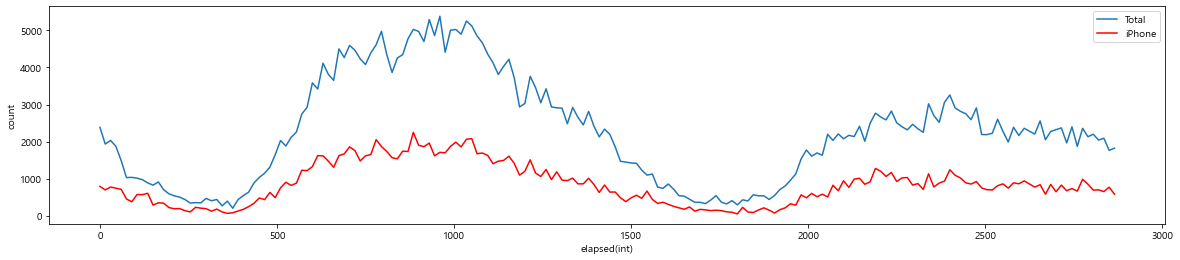

In [31]:
# devicetype 이 iPhone인 데이터를 가져옵니다.
target = data_time[data_time['devicetype'] == 'iPhone']

# iPhone 유저의 페이지뷰 변화량을 볼 수 있는 type_iPhone 피벗테이블을 생성합니다.
type_iPhone = pd.pivot_table(data = target, index = 'agg_minute', values = 'devicetype', aggfunc = 'count')

plt.figure(figsize = (20,4))      # 그래프의 사이즈를 설정합니다.
plt.plot(time_view.index, time_view.day, label = 'Total')     # 전체 페이지 뷰 변화량 그래프를 그리고, 범례로 Total 로 지정합니다.

# iPhone 유저의 페이지 뷰 변화량을 그리고, 그래프 색깔은 빨강(r), 범례는 iPhone 으로 설정합니다.
plt.plot(type_iPhone.index , type_iPhone.devicetype, color = 'r', label = 'iPhone')

plt.xlabel('elapsed(int)')  # x 축의 이름을 elapsed(int) 로 설정합니다.
plt.ylabel('count')         # y 축의 이름을 count 로 설정합니다.
plt.legend(loc = 0)      # 범례의 위치를 우측 상단으로 설정합니다.
plt.show()

또한 전체 페이지뷰 대비 특정 버전(ex: 4.0.4)에서 동작하는 페이지뷰의 변화량은 다음과 같습니다.

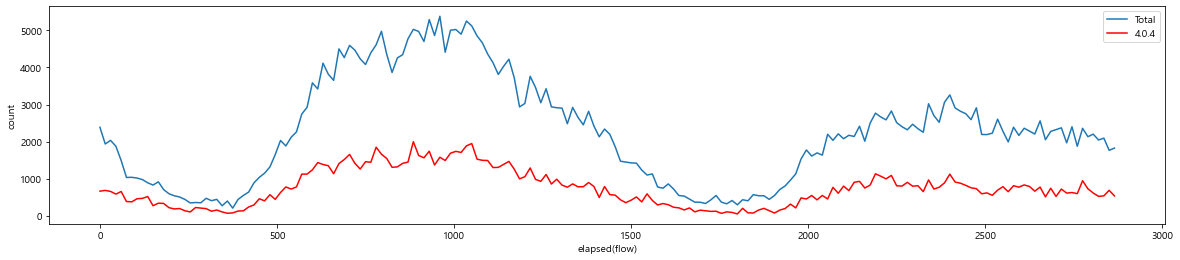

In [32]:
# 4.0.4 버전을 사용하는 데이터만 가져옵니다.
appversion = data_time[data_time['appversion'] == '4.0.4']

# 해당 버전 사용자의 페이지 뷰 변화를 볼 수 있도록 type_version 피벗 테이블을 생성합니다.
type_version = pd.pivot_table(data = appversion, index = 'agg_minute', values = 'appversion', aggfunc = 'count')

plt.figure(figsize = (20,4))
plt.plot(time_view.index, time_view.day, label = 'Total')

plt.plot(type_version.index, type_version.appversion, color = 'r', label = '4.0.4')

plt.xlabel('elapsed(flow)')
plt.ylabel('count')
plt.legend(loc = 'best')
plt.show()

다음의 기능을 구현하는 ```plot_pageview```라는 함수를 구현해주세요.

In [33]:
# plot_pageview라는 함수를 정의합니다. 함수에는 여러 옵션이 들어가는데,
# ostype, osversion, devicetype, appversion 모두 하나의 문자열 또는 리스트를 넣을 수 있습니다.
# 이 경우 인자로 넣은 정보에 해당하는 조건만 별도로 시각화를 합니다.
# 이 인자의 기본 값은 None입니다. 이 경우 해당 조건으로 별도 시각화를 하지 않습니다.
def plot_pageview(ostype = None, osversion = None, devicetype = None, appversion = None):
    # ToDo: 여기에 코드를 작성하여 find_log라는 함수를 완성해주세요.
    
    plt.figure(figsize = (20,4))               # 시각화 그래프의 크기를 설정합니다.
    plt.plot(time_view.index, time_view.day, label = 'Total') # 전체 페이지 뷰 그래프를 그리고, 범례를 Total 로 설정합니다.
    plt.legend(loc = 0)    # 범례의 위치를 그래프 우측 상단으로 설정합니다.
    
    if(ostype != None) :        # ostype parameter 가 빈 값이 아니라면 아래 조건문을 실행합니다.
        if(type(ostype) is list):   # ostype parameter 가 list 형태라면 아래의 조건문을 실행합니다.
            filtered_data = data_time.loc[data_time.ostype.isin(ostype)]  # list에 있는 값을 가진 데이터를 filtered_data로 저장합니다.

            # filtered_data 를 기반으로 하여 시간 흐름에 따른 ostype 사용자 페이지 뷰를 볼 수 있는 df 피벗 테이블을 생성합니다.
            df = pd.pivot_table(data = filtered_data, index = 'agg_minute', values = 'ostype', aggfunc = 'count')

            # df 피벗 테이블을 바탕으로 그래프를 그리고, 선 색은 빨강, 범례 이름은 ostype 입력값으로 지정합니다.
            result = plt.plot(df.index, df.ostype, color = 'r', label = ostype)
            plt.legend(loc = 0)   # 범례의 위치를 우측 상단로 저장합니다.
        else:
            filtered_data = data_time.loc[data_time.ostype == ostype]
            df = pd.pivot_table(data = filtered_data, index = 'agg_minute', values =  'ostype', aggfunc = 'count')
            result = plt.plot(df.index, df.ostype, color = 'r', label = ostype)
            plt.legend(loc = 0)
     
                     
    if(osversion != None):
        if(type(osversion) is list):
            filtered_data = data_time.loc[data_time.osversion.isin(osversion)]
            df = pd.pivot_table(data = filtered_data, index = 'agg_minute', values = 'osversion', aggfunc = 'count')
            result = plt.plot(df.index, df.osversion, color = 'r', label = osversion)
            plt.legend(loc = 0)
        else:
            filtered_data = data_time.loc[data_time.osversion == osversion]
            df = pd.pivot_table(data = filtered_data, index = 'agg_minute', values = 'osversion', aggfunc = 'count')
            result = plt.plot(df.index, df.osversion, color = 'r', label = osversion)
            plt.legend(loc = 0)
            
    if(devicetype != None):
        if(type(devicetype) is list):
            filtered_data = data_time.loc[data_time.devicetype.isin(devicetype)]
            df = pd.pivot_table(data = filtered_data, index = 'agg_minute', values = 'devicetype', aggfunc = 'count')
            result = plt.plot(df.index, df.devicetype, color = 'r', label = devicetype)
            plt.legend(loc = 0)
        else:
            filtered_data = data_time.loc[data_time.devicetype == devicetype]
            df = pd.pivot_table(data = filtered_data, index = 'agg_minute', values = 'devicetype', aggfunc = 'count')
            result = plt.plot(df.index, df.devicetype, color = 'r', label = devicetype)
            plt.legend(loc = 0)
    
    if(appversion != None):
        if(type(appversion) is list):
            filtered_data = data_time.loc[data_time.appversion.isin(appversion)]
            df = pd.pivot_table(data = filtered_data, index = 'agg_minute', values ='appversion', aggfunc = 'count')
            result = plt.plot(df.index, df.appversion, color = 'r', label = appversion)
            plt.legend(loc = 0)
        else:
            filtered_data = data_time.loc[data_time.appversion == appversion]
            df = pd.pivot_table(data = filtered_data, index = 'agg_minute', values ='appversion', aggfunc = 'count')
            result = plt.plot(df.index, df.appversion, color = 'r', label = appversion)
            plt.legend(loc = 0)
    
    return result   # 위의 조건에 맞게 만들어진 결과값 result 를 반환합니다.

    
    plt.xlabel('elapsed(int)')    # x 축의 이름은 elapsed(int)
    plt.ylabel('count')           # y 축의 이름은 count 로 설정합니다.
    
    plt.show()                    # 그래프를 표시합니다.

    pass

iOS 사용자의 페이지 뷰 변화를 보겠습니다.

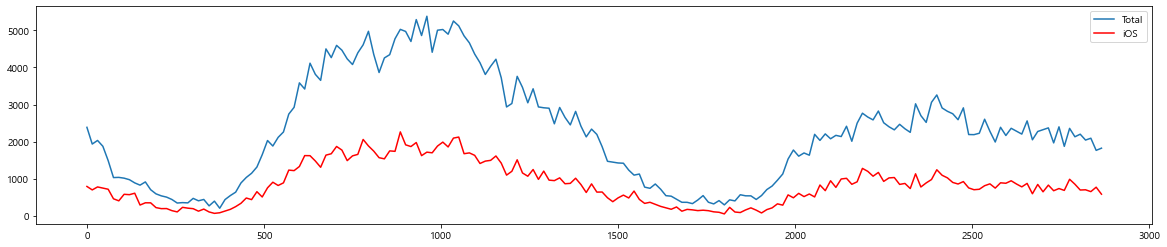

In [34]:
plot_pageview(ostype = 'iOS')

osversion 8.0.0 을 사용하는 사용자의 페이지 뷰 변화를 보겠습니다.

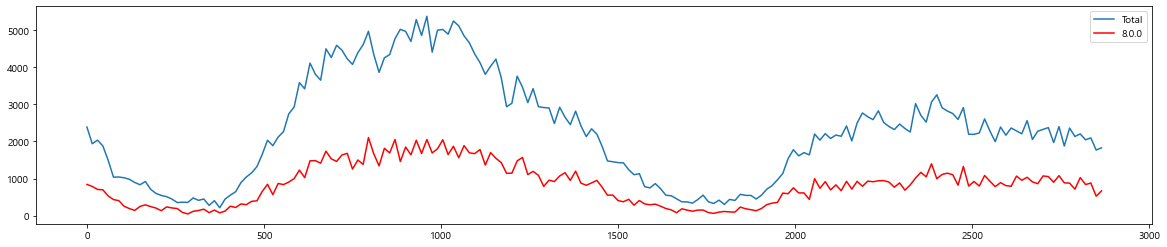

In [35]:
plot_pageview(osversion = '8.0.0')

SM-G950N 기종을 사용하는 사용자의 페이지 뷰 변화를 보겠습니다.

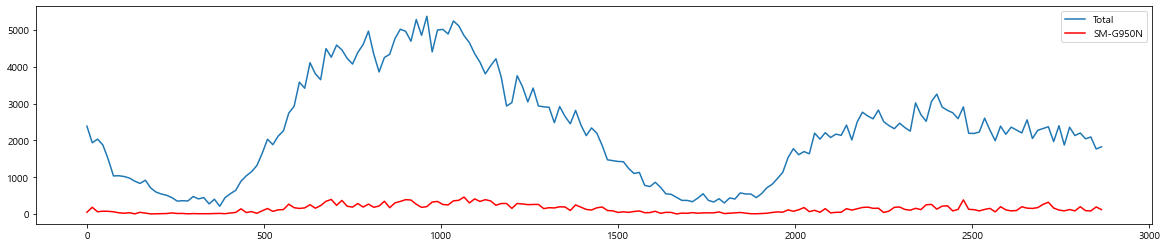

In [36]:
plot_pageview(devicetype = 'SM-G950N')

앱 버전 4.0.4를 사용하는 사용자의 페이지 뷰 변화를 보겠습니다.

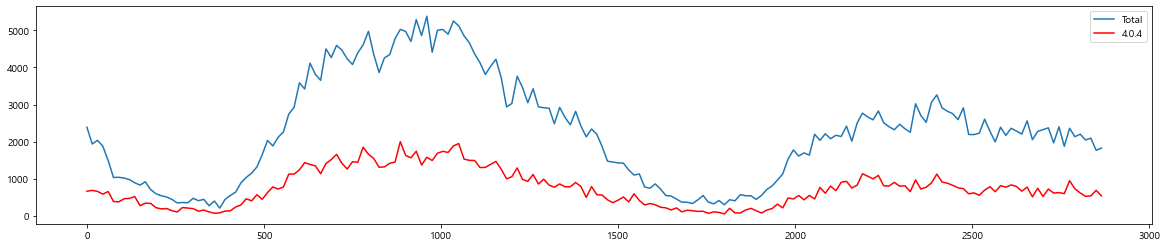

In [37]:
plot_pageview(appversion = '4.0.4')

### 3. 자유 주제 - 데이터를 활용하여 자유롭게 시각화를 해주세요.

마지막 문제는 자유 주제입니다. 특정한 형식에 구애받지 않고 자유롭게 데이터 분석과 시각화를 통해 데이터에서 인사이트를 추출해주세요.

크몽의 데이터에는 아직 우리가 분석하지 않은 미지의 요소들이 있습니다. 몇 가지 예시를 적어보자면 다음과 같습니다.

  * 시간별 이탈률 분석(bounce rate), 내지는 특정 페이지나 디바이스별 이탈률을 분석할 수도 있습니다.
  * 퍼널 분석(Funnel analysis), 사용자가 서비스에 방문해서 목표를 달성할 때 까지의 모든 과정을 시각화하고 분석할 수도 있습니다. ([참고](https://www.slideshare.net/LeeGwan/ss-42159541))
  * 목표(ex: 상품 구매)를 달성하는 사용자와 달성하지 않는 사용자의 차이를 분석할 수 있습니다.
  
주어진 내용을 바탕으로 자유롭게 분석 및 시각화를 한 뒤 제출하세요. 문제를 푸는 지원자의 분석 스킬, 그리고 상상력과 창의력을 최대한 활용하기를 기대합니다.

## 시간별 이탈률 분석

In [38]:
data_time['eventdatetime'].dt.dayofweek

# 27일은 목요일, 28일은 금요일, 29일은 토요일임을 알 수 있다.

userid                                rowuuid                             
A9E5778A-8F3D-4597-9718-74BF953A9F64  14eb3197-db83-493a-b7be-83582960c40b    3
8a871e50-0717-4aed-9bad-04ac3c3793be  e62dccef-dd70-4415-8a33-c8324ddaed38    3
F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957  fd2a188c-bc9b-4702-9c47-b546b2614817    3
168761CB-CB67-4592-867D-52780D651297  f9bb91af-248b-44dc-9f5c-1c00b37ea97b    3
8a871e50-0717-4aed-9bad-04ac3c3793be  a6d462c3-d4a3-4a2c-8942-88f2cae0012e    3
                                                                             ..
1fbc9ad2-8109-4294-ae9e-9acf6dce72c3  9d9fd3d8-30c5-49e5-8480-41b536eb4edb    5
                                      40bdc87e-265a-4cc2-a1d4-f1da96a0b9dc    5
ea69fbd8-16fe-4db4-ae1e-512d5bbd1d6f  88653965-4aff-4d2e-8dd6-88f25ac82595    5
                                      f44a488b-1a8b-4f53-ad8e-8b21c695925b    5
965b53e9-f6d6-4a9d-827e-e60c5eb52bb8  5fbb87c9-4d62-4eea-a75c-cab1a3af1d52    5
Name: eventdatetime, Length: 434244, dtype: i

앱 내에서의 활동이 background 로 전환되거나 exit 인 경우 kmong 앱에 대한 이탈로 판단됩니다. 0시부터 23시까지의 해당 활동 그래프를 그려본 결과, 취침시간대인 ``23~8시``까지는 앱의 이탈이 증가하고 많은 시점임을 알 수 있습니다. 마찬가지로 활동시간대인 ``9~21시``까지는 앱의 이탈 수가 상대적으로 저조함을 알 수 있습니다. 만약 앱의 사용자에 대한 이벤트 기획 혹은 알림을 전송한다면 ``9~21시``가 적당하다고 판단됩니다.

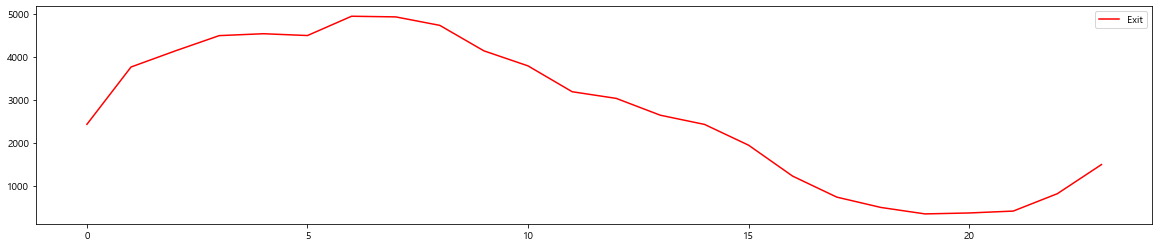

In [39]:
# eventcategory 앱 활동에서 background , exit 활동을 한 데이터를 찾겠습니다.
# 'exit' 이란 컬럼을 eventcategory 컬럼을 통해 생성합니다.
data_time['exit'] = data_time['eventcategory']

# eventcategory 컬럼의 값이 exit 또는 background 인 데이터를 exit 컬럼에 EXIT 으로 저장합니다.
data_time.loc[(data_time['eventcategory'] == 'exit') | (data_time['eventcategory'] == 'background'), 'exit'] = 'EXIT'
data_time[['eventcategory','exit']].head()

# exit 컬럼에 EXIT 값을 가진 데이터만 따로 추출합니다.
filtered_data = data_time.loc[data_time.exit == 'EXIT']

# EXIT 값만 가진 데이터를 필터링한 후 시간대 별로 그 개수를 확인할 수 있는 피벗테이블 df 를 생성합니다.
df = pd.pivot_table(data = filtered_data, index = 'hour', values = 'exit', aggfunc = 'count')

# df_total = pd.pivot_table(data = data_time, index = 'hour', values = 'ostype', aggfunc = 'count')

plt.figure(figsize = (20,4))               # 시각화 그래프의 크기를 설정합니다.
# plt.plot(df_total.index, df_total.ostype, label = 'Total') # 전체 페이지 뷰 그래프를 그리고, 범례를 Total 로 설정합니다.
plt.plot(df.index, df.exit, color = 'r', label = 'Exit')

plt.legend(loc = 0)    # 범례의 위치를 그래프 우측 상단으로 설정합니다.

plt.show()


평일과 휴일은 kmong 서비스를 이용하는 사람들에게 어느 정도 차이가 있을 것 같습니다. 실제로 제공된 데이터의 27일과 28일은 평일이며 29일은 휴일입니다. 일자별 시간대에 따른 eventcategory의 변화를 파악하여 시사점이 있는 지 보겠습니다.

In [40]:
# 평일(목,금)과 휴일(토) 사이에 시간별 이탈률의 차이가 있는지 살펴보겠습니다.
# 일자별 시간대를 확인하기 쉽도록 'day' 컬럼과 'hour'컬럼을 합친 day_hour 컬럼을 만듭니다.
# hour 컬럼의 데이터 형태를 문자형태로 바꾼 hour(str) 컬럼을 만듭니다.
data_time['hour(str)'] = data_time['hour'].astype('str')

# hour 데이터 값이 0시 이면 00시 의 형태를 갖도록 자리수를 2자리로 바꿔줍니다.
data_time['hour(str)'] = pd.Series(data_time['hour(str)']).astype(str).str.zfill(2)
data_time[['hour','hour(str)']]

# day 컬럼과 hour(str) 컬럼을 합쳐 일-시 데이터를 만듭니다.
data_time['day_hour'] = data_time['day'].astype('str') + '-' + data_time['hour(str)']

data_time[['day','hour','day_hour']].head()

,,day,hour,day_hour
userid,rowuuid,,,
A9E5778A-8F3D-4597-9718-74BF953A9F64,14eb3197-db83-493a-b7be-83582960c40b,27,15,27-15
8a871e50-0717-4aed-9bad-04ac3c3793be,e62dccef-dd70-4415-8a33-c8324ddaed38,27,15,27-15
F36FAA62-ADAC-4AA5-9B00-1FD6CB7EE957,fd2a188c-bc9b-4702-9c47-b546b2614817,27,15,27-15
168761CB-CB67-4592-867D-52780D651297,f9bb91af-248b-44dc-9f5c-1c00b37ea97b,27,15,27-15
8a871e50-0717-4aed-9bad-04ac3c3793be,a6d462c3-d4a3-4a2c-8942-88f2cae0012e,27,15,27-15


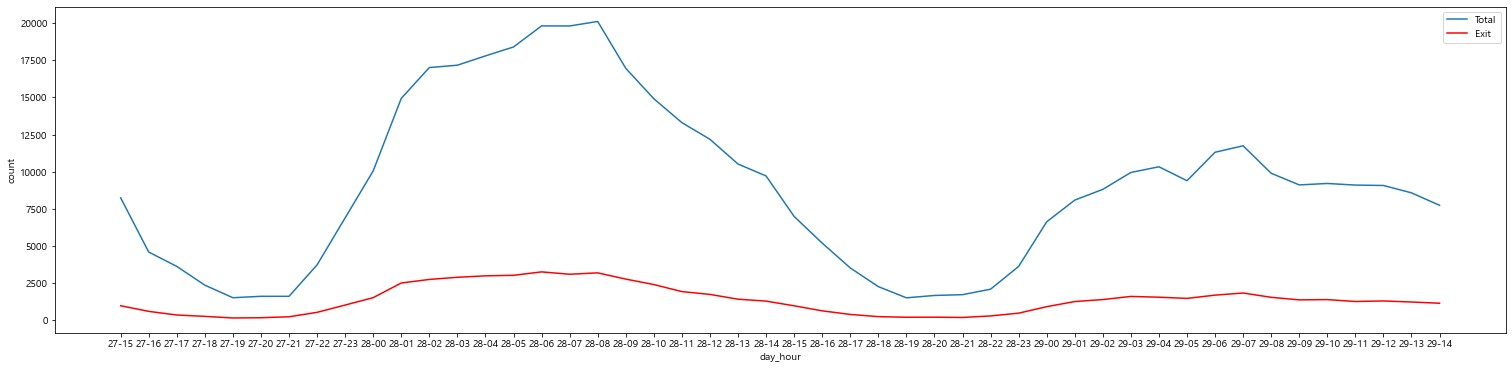

In [41]:
# 일-시 별로 eventcategory 의 총량을 나타내는 dayhour 피벗테이블을 만듭니다.
dayhour = pd.pivot_table(data = data_time, index = 'day_hour', values = 'eventcategory', aggfunc = 'count')

# eventcategory 값이 background, exit 인 데이터만 추출하여 df 피벗테이블로 만듭니다.
filtered_data = data_time.loc[data_time.exit == 'EXIT']
df = pd.pivot_table(data = filtered_data, index = 'day_hour', values = 'exit', aggfunc = 'count')

plt.figure(figsize = (26,6))
plt.plot(dayhour.index, dayhour.eventcategory , label = 'Total')     # 일-시 별 eventcategory 의 총 페이지 뷰의 변화를 범례 Total 로 표시합니다.
plt.plot(df.index, df.exit, color = 'r', label = 'Exit')         # 일-시 별 exit(이탈)의 수를 범례 Exit 으로 표시합니다.
plt.xlabel('day_hour')
plt.ylabel('count')
plt.legend(loc = 0)     # 범례를 우측 상단에 표시합니다.

plt.show()

In [42]:
# exit / total 을 토애 conversion_rate(%)를 구합니다.
df.reset_index()
dayhour.reset_index()

# 위에 필터링한 데이터를 시간대를 기준으로 병합해줍니다.
df_merge = pd.merge(dayhour, df, on = 'day_hour')
df_merge

# (exit / eventcategory) * 100 을 하여 conversion_rate(%) 컬럼을 만들어 그 안에 넣어줍니다. 소수점은 둘째 자리까지만 표기합니다.
df_merge['conversion_rate(%)'] = ((df_merge['exit'] / df_merge['eventcategory']) * 100).round(2)
df_merge

,eventcategory,exit,conversion_rate(%)
day_hour,,,
27-15,8239,975,11.83
27-16,4589,596,12.99
27-17,3623,351,9.69
27-18,2361,259,10.97
27-19,1514,151,9.97
27-20,1609,168,10.44
27-21,1609,231,14.36
27-22,3725,531,14.26
27-23,6888,1021,14.82


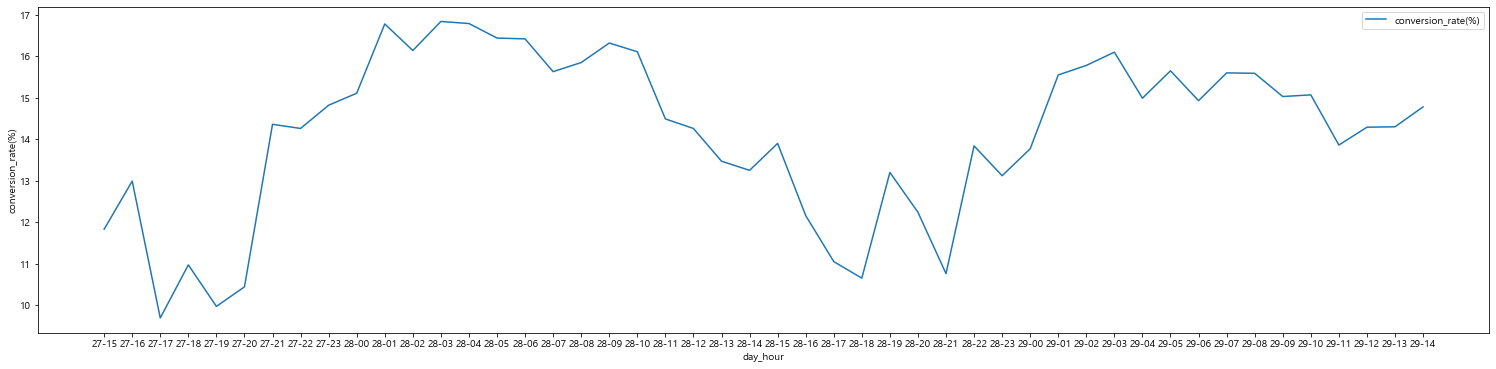

In [43]:
# 시간대별 conversion rate(%)를 볼 수 있는 그래프를 그립니다.
plt.figure(figsize = (26,6))
plt.plot(df_merge.index, df_merge['conversion_rate(%)'], label = 'conversion_rate(%)')
plt.ylabel('conversion_rate(%)')
plt.xlabel('day_hour')
plt.legend(loc = 0)
plt.show()

평일과 휴일 사이의 앱 이탈률에 차이를 알아보겠습니다. 먼저 27일과 28일은 목요일, 금요일로 평일이며 29일은 토요일로 휴일 데이터입니다.
기존에 살펴본 시간별 데이터와 마찬가지로 21시 이후부터 앱 이탈 수가 빠르게 증가하고 09시 이후 수가 감소하는 것을 볼 수 있습니다. 다만 다음날이 휴일인 28일이 23시와 27일 23시의 앱 이탈률은 차이가 보임을 알 수 있습니다. 휴일의 영향이 심야시간의 앱 이탈률에 영향을 미침을 알 수 있습니다.

06-08시 사이의 전체 페이지 뷰에서 평일이 휴일에 비해 압도적으로 높음을 알 수 있고, 휴일의 경우 심야시간대의 사용이 평일에 비해 많음을 알 수 있습니다. 사용자의 혜택과 이벤트 기획을 구성하는 데 있어 평일의 사용자가 많은 시간대, 휴일의 사용자가 활동하는 시간대를 활용할 수 있을 것 입니다.

## Funnel 분석

In [84]:
dft = pd.pivot_table(data = data, index ='viewid', values = 'devicemanufacturer', aggfunc = 'count')
dft_m = dft.merge(funnel, on = 'viewid', how = 'left')

dft_m = dft_m.sort_values(by = 'Lv1', ascending = True)
dft_m
columns = ['Lv1','Lv2','viewid','devicemanufacturer', 'viewid desc', 'funnel name', 'funnel desc']

dft_m = dft_m[columns]
dft_m = dft_m.rename(columns ={'devicemanufacturer' : 'Total Count'} )
dft_m

,Lv1,Lv2,viewid,Total Count,viewid desc,funnel name,funnel desc
23,11.0,1100.0,home,53945,홈 (탭),home,홈
19,12.0,1210.0,category_list,3135,카테고리 목록 (탭),category,카테고리
17,12.0,1200.0,category_gig,20191,카테고리-상품목록,category,카테고리
43,13.0,1300.0,search,8020,검색,search,검색
44,13.0,1301.0,search_gig,11356,검색-상품목록,search,검색
46,13.0,1302.0,search_seller,66,검색-전문가,search,검색
41,14.0,1420.0,profile,1173,전문가프로필,gig,상품
22,14.0,1401.0,gig_detail_option,1578,상품상세-상품선택,gig,상품
21,14.0,1400.0,gig_detail,37807,상품상세,gig,상품
34,15.0,1520.0,login_sns,1795,간편로그인,login,로그인


In [85]:
dft_m.loc[(dft_m['Lv1']>=11) & (dft_m['Lv1']<=14), 'Step'] = "initial"
dft_m.loc[(dft_m['Lv1']>15) & (dft_m['Lv1']<20), 'Step'] = "payment"
dft_m.loc[dft_m['Lv1'] == 15, 'Step'] = 'login'
dft_m.loc[(dft_m['Lv1']>=20) & (dft_m['Lv1']<=23), 'Step'] = 'account management'
dft_m.loc[(dft_m['Lv1'] == 24), 'Step'] = "transaction management"
dft_m.loc[(dft_m['Lv1'] > 24), 'Step'] = 'None'

dft_m

,Lv1,Lv2,viewid,Total Count,viewid desc,funnel name,funnel desc,Step
23,11.0,1100.0,home,53945,홈 (탭),home,홈,initial
19,12.0,1210.0,category_list,3135,카테고리 목록 (탭),category,카테고리,initial
17,12.0,1200.0,category_gig,20191,카테고리-상품목록,category,카테고리,initial
43,13.0,1300.0,search,8020,검색,search,검색,initial
44,13.0,1301.0,search_gig,11356,검색-상품목록,search,검색,initial
46,13.0,1302.0,search_seller,66,검색-전문가,search,검색,initial
41,14.0,1420.0,profile,1173,전문가프로필,gig,상품,initial
22,14.0,1401.0,gig_detail_option,1578,상품상세-상품선택,gig,상품,initial
21,14.0,1400.0,gig_detail,37807,상품상세,gig,상품,initial
34,15.0,1520.0,login_sns,1795,간편로그인,login,로그인,login


funnel 데이터 중 성격이 비슷한 데이터들을 initial, payment, login, account management, transaction management, None 으로 구분합니다.
이 중 의미가 있는 데이터는 kmong에 접속하는 **initial**, 거래를 나타내는 **payment**, 기존 거래를 진행하는 **transaction management** 일 것입니다.
이 세 개의 데이터를 주로 분석하겠습니다.

In [46]:
# data_time 데이터와 merge 할때 필요한 컬럼만 남기기

columns = ['Lv1','viewid','Step']

dft_n = dft_m[columns]
dft_n

,Lv1,viewid,Step
23,11.0,home,initial
19,12.0,category_list,initial
17,12.0,category_gig,initial
43,13.0,search,initial
44,13.0,search_gig,initial
46,13.0,search_seller,initial
41,14.0,profile,initial
22,14.0,gig_detail_option,initial
21,14.0,gig_detail,initial
34,15.0,login_sns,login


In [86]:
data_merge = data_time.merge(dft_n, on = 'viewid', how = 'left')
data_merge = data_merge.loc[(data_merge['Step'] == 'initial') | (data_merge['Step'] == 'payment') | (data_merge['Step'] == 'login') |
               (data_merge['Step'] == 'transaction management')]

data_merge.head()

,eventdatetime,devicemanufacturer,devicetype,ostype,osversion,appversion,eventcategory,viewid,viewaction,funnel desc,viewid desc,categoryname,category1,category2,category3,sourcetype,channel,params_campaign,params_medium,params_term,isfirstactivity,isfirstgoalactivity,day,hour,minute,agg_minute,exit,hour(str),day_hour,Lv1,Step
0,2018-09-27 15:00:00,Apple,iPhone,iOS,12.0,4.0.4,goal,inbox_detail,view,메시지,메시지목록-상세,NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False,27,15,0,0,goal,15,27-15,16.0,payment
1,2018-09-27 15:00:00,samsung,SM-N935S,Android,7.0,3.3.5,goal,gig_detail,view,상품,상품상세,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,unattributed,NaN,NaN,NaN,False,False,27,15,0,0,goal,15,27-15,14.0,initial
2,2018-09-27 15:00:00,Apple,iPhone,iOS,11.4.1,4.0.4,goal,home,view,홈,홈 (탭),NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False,27,15,0,0,goal,15,27-15,11.0,initial
4,2018-09-27 15:00:02,samsung,SM-N935S,Android,7.0,3.3.5,goal,gig_detail,view,상품,상품상세,자기소개서,문서작성,자기소개서·이력서,자기소개서,unattributed,unattributed,NaN,NaN,NaN,False,False,27,15,0,0,goal,15,27-15,14.0,initial
5,2018-09-27 15:00:02,samsung,SM-G955N,Android,8.0.0,3.3.5,goal,home,view,홈,홈 (탭),NaN,NaN,NaN,NaN,unattributed,unattributed,NaN,NaN,NaN,False,False,27,15,0,0,goal,15,27-15,11.0,initial


In [87]:
pd.pivot_table(data = data_merge, index = 'Step', values = 'day', aggfunc = 'count')

,day
Step,
initial,137271
login,2183
payment,94209
transaction management,55941


funnel 단계중 중요하다고 생각되는 initial , payment , transaction management 부분을 살펴보겠습니다.

간편로그인, 회원가입과 같이 접속 단계에 있는 login 부분은 수치가 전체에 비해 미약하므로 이번 분석에서 제외하겠습니다.
**(신규회원 가입은 중요한 지표지만 단기간의 데이터이며 수치가 매우 미비하므로 제외하겠습니다.)**

먼저, 전체 페이지뷰의 시간별 변동 대비 해당 funnel 그룹의 시간별 변동량을 살펴보겠습니다.

In [78]:
def find_step(Step):

    plt.figure(figsize = (20,6))               # 시각화 그래프의 크기를 설정합니다.            
    plt.plot(dayhour.index, dayhour.eventcategory , label = 'Total') # 전체 페이지 뷰 그래프를 그리고, 범례를 Total 로 설정합니다.
    plt.legend(loc = 0)    # 범례의 위치를 그래프 우측 상단으로 설정합니다.
    
    filtered_data = data_merge.loc[data_merge['Step'] == Step]
    pivot = pd.pivot_table(data = filtered_data, index = 'day_hour', values = 'Step', aggfunc = 'count')
        
    result = plt.plot(pivot.index, pivot.Step, label = Step)
    plt.legend(loc = 0)

    return result

    plt.ylabel('Count')
    plt.xlabel('elapsed')
    
    plt.show()

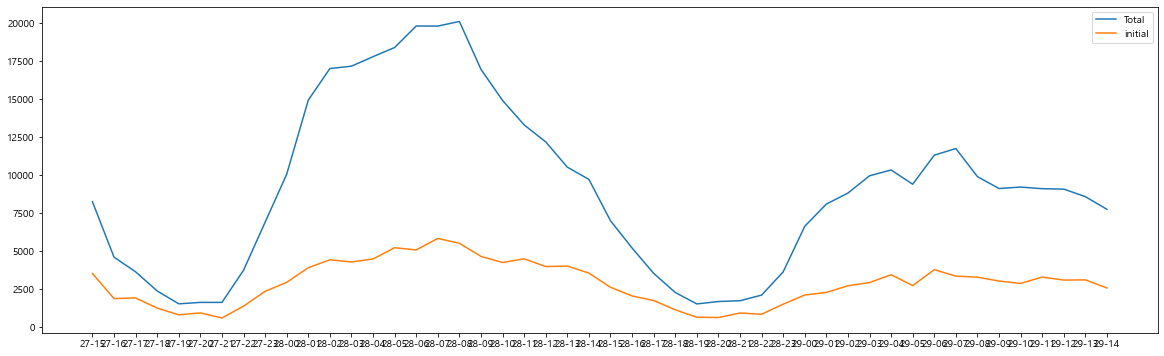

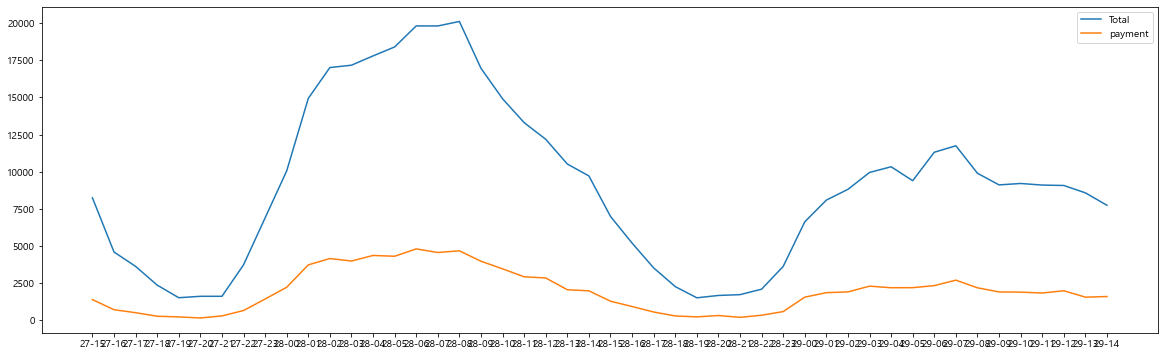

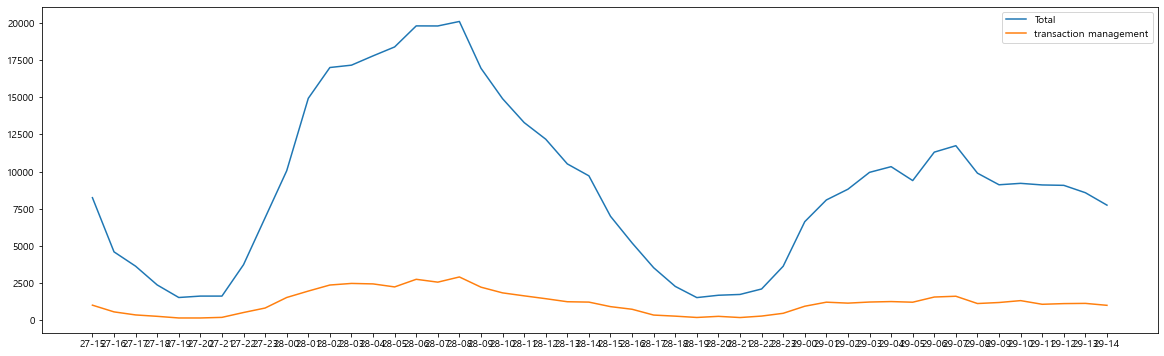

In [88]:
find_step('initial')
find_step('payment')
find_step('transaction management')

시간의 흐름에 따른 전체 페이지뷰의 흐름과 각 funnel 데이터 그룹의 흐름은 매우 유사해보이며, 이를 통해 kmong 앱 유저를 향한 마케팅은 이용량이 많은 시간대를 target 으로 해야함을 알 수 있습니다.

각각의 funnel 데이터 그룹간 비교를 해보겠습니다.

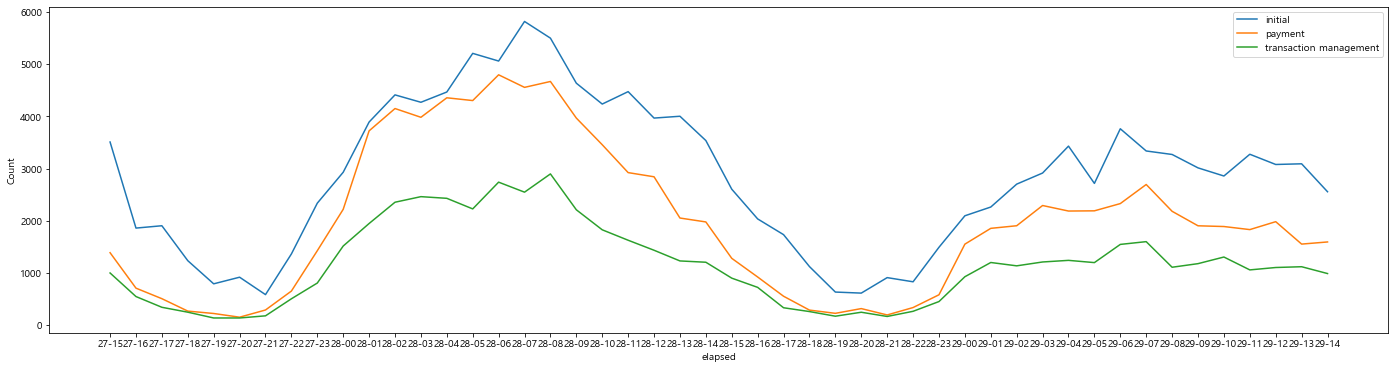

In [90]:
filtered_data = data_merge.loc[data_merge['Step'] == 'initial']
pivot = pd.pivot_table(data = filtered_data, index = 'day_hour', values = 'Step', aggfunc = 'count')

filtered_data2 = data_merge.loc[data_merge['Step'] == 'payment']
pivot2 = pd.pivot_table(data = filtered_data2, index = 'day_hour', values = 'Step', aggfunc = 'count')

filtered_data3 = data_merge.loc[data_merge['Step'] == 'transaction management']
pivot3 = pd.pivot_table(data = filtered_data3, index = 'day_hour', values = 'Step', aggfunc = 'count')

plt.figure(figsize = (24,6))
plt.plot(pivot.index, pivot.Step, label = 'initial')
plt.plot(pivot2.index, pivot2.Step, label = 'payment')
plt.plot(pivot3.index, pivot3.Step, label = 'transaction management')

plt.legend(loc = 0)
plt.xlabel('elapsed')
plt.ylabel('Count')
plt.show()

 initial > payment > transaction management 단계순으로 페이지뷰 양이 많음을 알 수 있습니다.

 구매 단계에 있는 사용자가 초기 단계에 있는 사용자만큼 많은 비중을 차지하고 있습니다. kmong 내 구매자가 쉽게 찾을 수 있는 category의 정리, 공신력있는 seller 유입, 추천 등 구매자가 쉽게 거래가 이루어질 수 있는 환경을 꾸준히 제공해주는 것이 중요할 것 같습니다.

 또한, transaction management 단계에 있는 사용자에게 있어 kmong에서 이루어지는 거래가 성공적으로 이루어지는 경험이 재구매, kmong의 재이용률을 높이는 훌륭한 수단이 될 수 있으므로 이 단계에서 이루어질 수 있는 판매-구매자간의 실시간 대화 기능, 불편 신고 기능 등 다양한 기능들을 살피고 이를 개선하는 것이 중요할 것 같습니다.

## 채널별 유입 경로 살펴보기

kmong 서비스에 접속하는 다양한 유입 경로를 살펴보겠습니다. 이는 데이터 표에 channel 컬럼에 표시되어 있습니다.

In [92]:
pd.pivot_table(data = data_merge, index = 'channel', values = 'day', aggfunc = 'count')

,day
channel,
(not set),2213
WEB,24536
apple.searchads,584
facebook,104
google,2823
google-play,17718
google.adwords,3173
m_daum,876
m_naver,720


위의 데이터를 살펴보면 apple / google의 ads 및 m_naverpowercontents 를 통해 유입되는 수가 많지 않음을 알 수 있습니다. 전체 마케팅 비용 중 해당 채널에 마케팅 비중이 높다면 해당 비용이 보다 영향력 있는 채널에 쓰일 수 있도록 하는 것이 비용 집행에 있어 효율적일 것입니다.

google-play를 통해 앱을 활용하여 kmong을 사용하는 이용자의 경우 해당 app을 지속적으로 이용하도록 어플의 꾸준한 개선점을 살펴봐야겠습니다.
또한 가장 많은 비중을 차지하고 있는 unattributed 를 확인, 세분화하여 유입에 영향을 주는 채널을 찾아 이 곳에 마케팅 비용을 재조정할 수도 있겠습니다.

### 과제 제출

과제를 모두 푼 분들은 datascience@dsschool.co.kr 에 결과를 제출해주세요. 제출할 때는 다음의 자료가 필요합니다.

1. 과제를 푼 쥬피터 노트북. ipynb 파일로 보내주시면 됩니다.
1. 과제를 푼 지원자의 이력을 알 수 있는 이력서와 포트폴리오, 기타 본인의 커리어와 능력을 어필할 수 있는 자료.

과제에 대해 궁금한 점이 있다면 datascience@dsschool.co.kr로 문의 메일을 보내주세요. 다만 면접용 과제이니만큼 과제 풀이에 대한 힌트를 드릴 수는 없으며, 동일한 이유로 과제에 대한 솔루션을 제공해드릴 수 없는 점 양해 부탁드립니다. (컬럼이나 데이터, 그리고 문제에 대한 부연설명 요청 등은 언제든지 환영합니다)

수업 내용, 과제에 대한 문의사항은 datascience@dsschool.co.kr로, 수료증이나 기수 변경, 기타 영수증 발급은 support@dsschool.co.kr 로 보내주세요.